In [2]:
# Import Libraries 

# Data Cleaning ,Manipulation & Analysis
import pandas as pd

# Analysis & Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Libraries to handle the DateTime
import datetime
from datetime import datetime


Import DataSet 

In [3]:
# Access all Sheets 
forest_Anti= pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='ANTI')
forest_CATO = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='CATO')
forest_CHOH = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='CHOH')
forest_GWMP = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='GWMP')
forest_HAFE = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='HAFE')
forest_MANA = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='MANA')
forest_MONO = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='MONO')
forest_NACE = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='NACE')
forest_PRWI = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='PRWI')
forest_ROCR = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='ROCR')
forest_WOTR = pd.read_excel(r'd:\workpads\Project 2 - Dataset\Bird_Monitoring_Data_FOREST.XLSX',sheet_name='WOTR')

# Concatenate all sheets
forest = pd.concat([forest_Anti,forest_CATO,forest_CHOH,forest_GWMP,forest_HAFE,forest_MANA,forest_MONO,forest_NACE,forest_PRWI,forest_ROCR,forest_WOTR])
# Copy dataset in 'df' variable
df = forest.copy()
# View the first 5 rows
df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


Data Cleeaning

In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8546 entries, 0 to 126
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8546 non-null   object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    8546 non-null   object        
 4   Location_Type                8546 non-null   object        
 5   Year                         8546 non-null   int64         
 6   Date                         8546 non-null   datetime64[ns]
 7   Start_Time                   8546 non-null   object        
 8   End_Time                     8546 non-null   object        
 9   Observer                     8546 non-null   object        
 10  Visit                        8546 non-null   int64         
 11  Interval_Length              8546 non-null   obje

In [5]:
# Count Duplicates
display(df.duplicated().sum())
# Drop Duplicates if exist
df.drop_duplicates(inplace=True)

np.int64(0)

Admin_Unit_Code                   0
Sub_Unit_Code                  7824
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                 

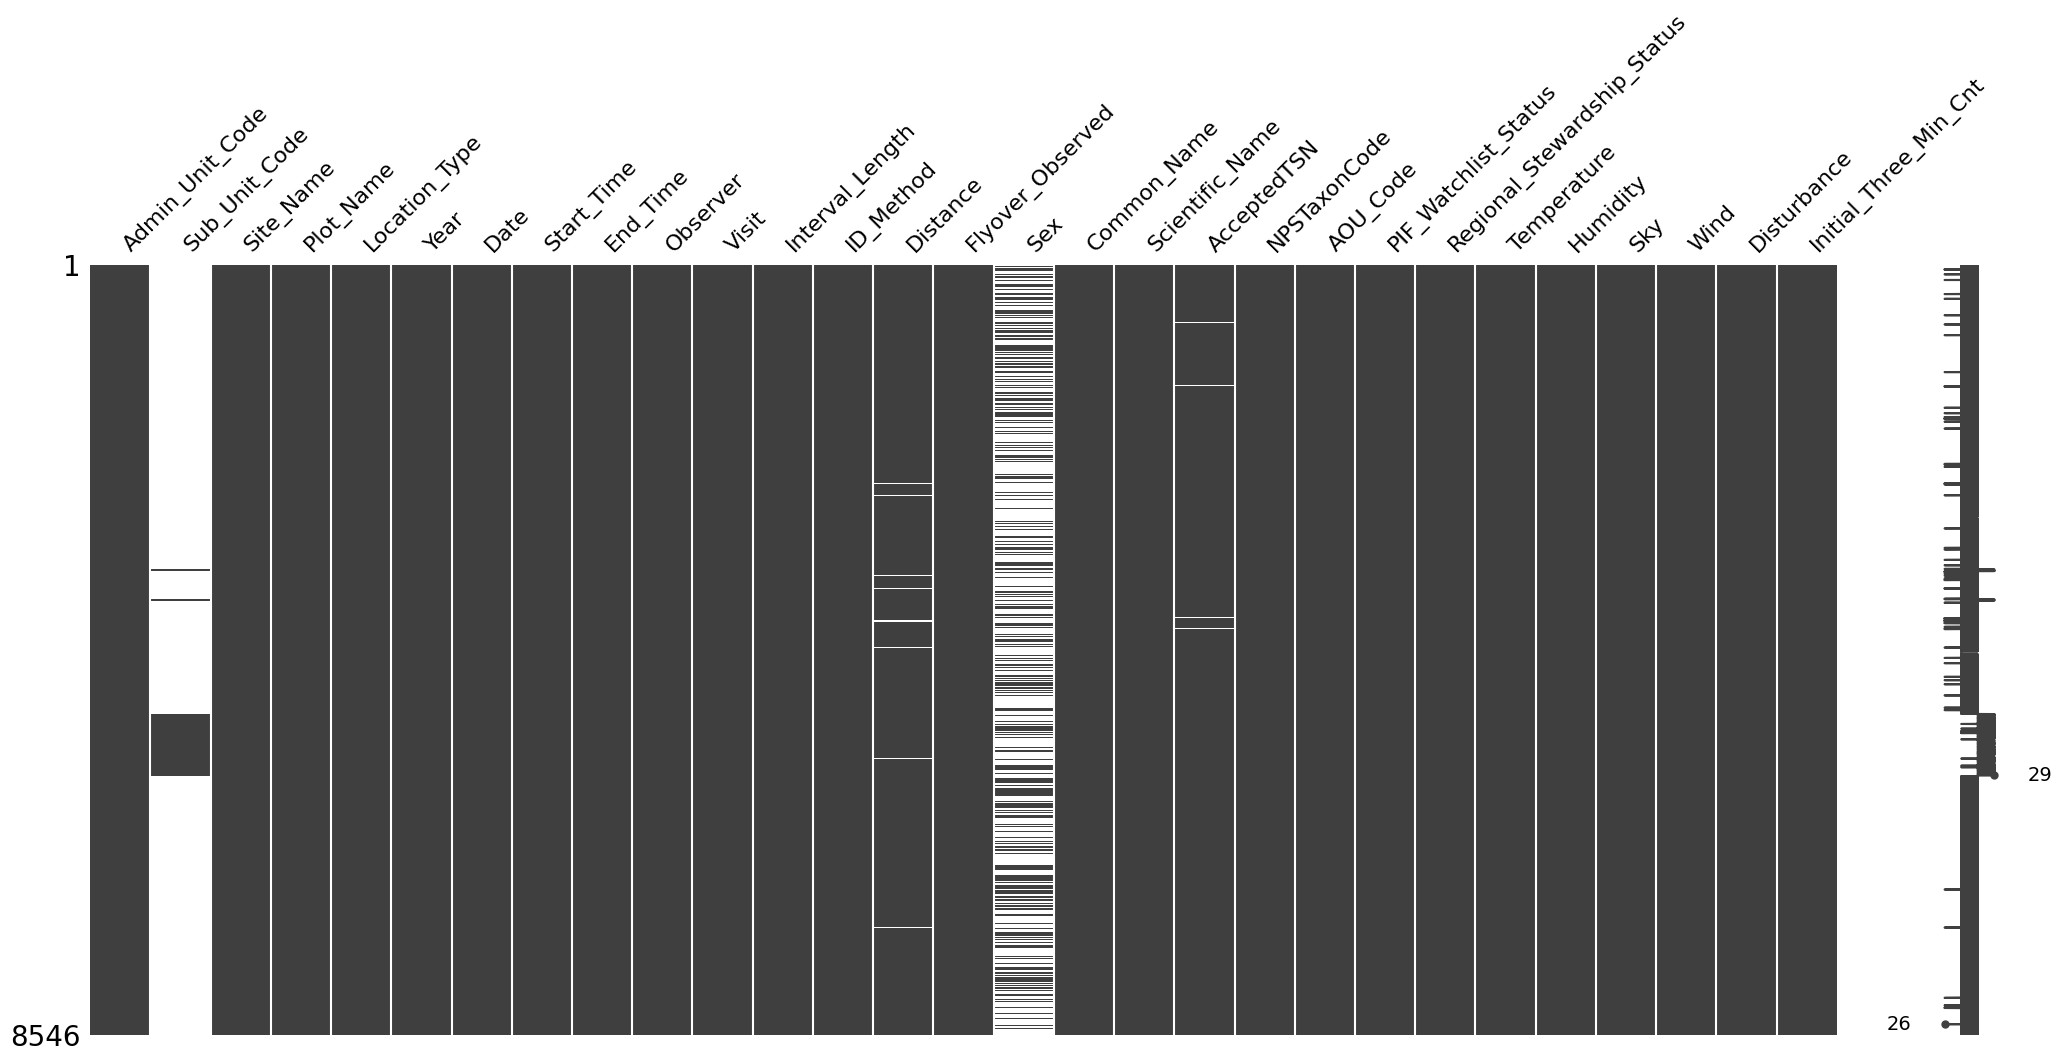

In [6]:
# vizuvaliz the null values
msno.matrix(df)
display(df.isna().sum())

array(['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE',
       'PRWI', 'ROCR', 'WOTR'], dtype=object)

<Axes: >

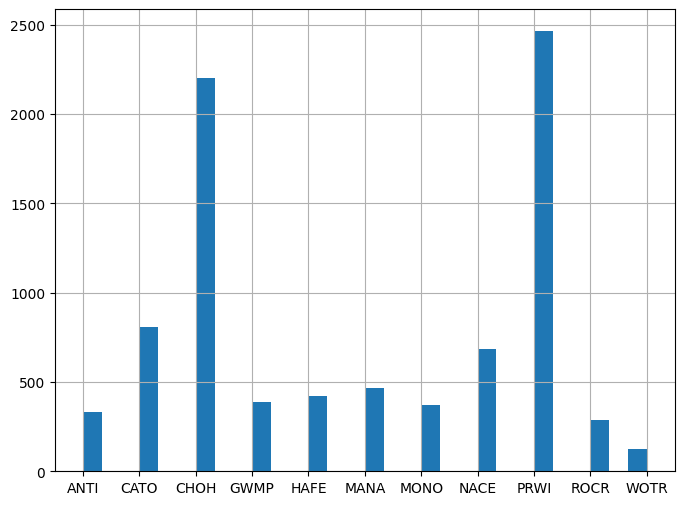

In [7]:
# Admin Unit code : The Admin Unit Code indicates the administrative unit responsible for conducting the observation.
display(df['Admin_Unit_Code'].unique())

# Ditribution
df['Admin_Unit_Code'].hist(figsize=(8,6),bins=30)

# Insights:
# "CHOH" and "PRWI" are the most frequent categories, with values close to 2,500. These categories dominate the dataset.
# "ANTI", "CATO", "ROCR", and "WOTR" have much lower values, indicating they occur less frequently in the dataset.

In [8]:
# Sub Unit code : The sub-unit within the administrative unit for further classification.

display(df['Sub_Unit_Code'].unique())

# Percentage of null values
display(df['Sub_Unit_Code'].isna().sum()/len(df['Sub_Unit_Code'])*100)

# This feature has over 90% missing data, making it less informative. Therefore, it is appropriate to drop this column
df.drop(columns=['Sub_Unit_Code'],axis=1,inplace=True)


array([nan, 'THIS', 'GREE', 'PISC', 'FOWA', 'OXHI', 'ANAC', 'FOCI',
       'FODU'], dtype=object)

np.float64(91.55160308916453)

array(['ANTI 1', 'ANTI 2', 'CATO 1', 'CATO 4', 'CATO 3', 'CATO 8',
       'CATO 6', 'CATO 2', 'CATO 5', 'CATO 7', 'CHOH 1', 'CHOH 6',
       'CHOH 8', 'CHOH 7', 'CHOH 10', 'CHOH 5', 'GWMP 2', 'GWMP 4',
       'GWMP 3', 'CHOH 18', 'CHOH 12', 'CHOH 14', 'CHOH 11', 'CHOH 15',
       'CHOH 16', 'CHOH 17', 'GWMP 5', 'GWMP 6', 'GWMP 1', 'HAFE 2',
       'HAFE 1', 'HAFE 3', 'MANA 4', 'MANA 2', 'MANA 1', 'MANA 3',
       'MONO 1', 'MONO 2', 'MONO 3', 'NACE 5', 'NACE 2', 'NACE 4b',
       'NACE 4a', 'NACE 3', 'NACE 1', 'PRWI 6', 'PRWI 3', 'PRWI 1',
       'PRWI 5', 'PRWI 7', 'PRWI 8', 'PRWI 12', 'PRWI 15', 'PRWI 9',
       'PRWI 10', 'PRWI 22', 'PRWI 17', 'PRWI 11', 'PRWI 21', 'PRWI 20',
       'PRWI 19', 'PRWI 14', 'PRWI 18', 'PRWI 13', 'PRWI 16', 'PRWI 2',
       'PRWI 4', 'ROCR 2', 'ROCR 1', 'WOTR'], dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69],
 [Text(0, 0, 'ANTI 1'),
  Text(1, 0, 'ANTI 2'),
  Text(2, 0, 'CATO 1'),
  Text(3, 0, 'CATO 4'),
  Text(4, 0, 'CATO 3'),
  Text(5, 0, 'CATO 8'),
  Text(6, 0, 'CATO 6'),
  Text(7, 0, 'CATO 2'),
  Text(8, 0, 'CATO 5'),
  Text(9, 0, 'CATO 7'),
  Text(10, 0, 'CHOH 1'),
  Text(11, 0, 'CHOH 6'),
  Text(12, 0, 'CHOH 8'),
  Text(13, 0, 'CHOH 7'),
  Text(14, 0, 'CHOH 10'),
  Text(15, 0, 'CHOH 5'),
  Text(16, 0, 'GWMP 2'),
  Text(17, 0, 'GWMP 4'),
  Text(18, 0, 'GWMP 3'),
  Text(19, 0, 'CHOH 18'),
  Text(20, 0, 'CHOH 12'),
  Text(21, 0, 'CHOH 14'),
  Text(22, 0, 'CHOH 11'),
  Text(23, 0, 'CHOH

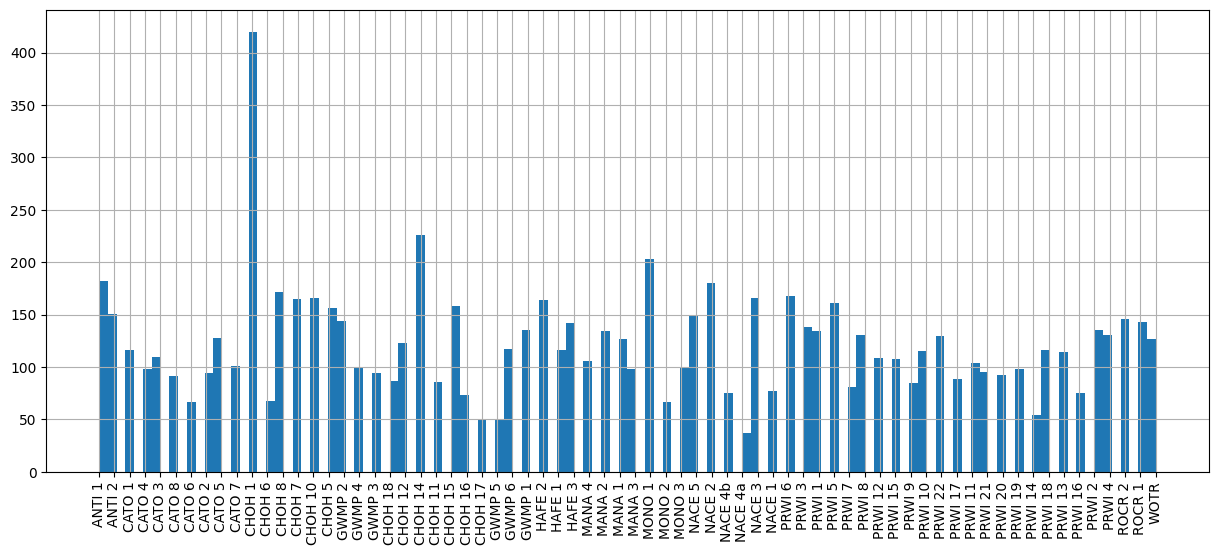

In [9]:
# Site Name : The name of the specific observation site within the unit.

display(df['Site_Name'].unique())

# Ditribution
df['Site_Name'].hist(figsize=(15,6),bins=120)
plt.xticks(rotation=90)

# Insights:
# "CHOH" appears as a dominant category, with several instances (e.g., "CHOH 1", "CHOH 2", etc.), and its count varies widely, with "CHOH 1" reaching over 400, indicating a high frequency for that specific subcategory.
#  others categories appear multiple times with varying counts, with some having counts above 150

In [10]:
# Plot_Name : A unique identifier for the specific plot where observations were recorded.
display(df['Plot_Name'].unique())

array(['ANTI-0036', 'ANTI-0082', 'ANTI-0078', 'ANTI-0025', 'ANTI-0052',
       'ANTI-0072', 'ANTI-0092', 'ANTI-0190', 'ANTI-0194', 'ANTI-0200',
       'ANTI-0206', 'ANTI-0207', 'ANTI-0201', 'CATO-0003', 'CATO-0016',
       'CATO-0035', 'CATO-0037', 'CATO-0049', 'CATO-0237', 'CATO-0294',
       'CATO-0160', 'CATO-0271', 'CATO-0176', 'CATO-0101', 'CATO-0092',
       'CATO-0062', 'CATO-0098', 'CATO-0094', 'CATO-0365', 'CATO-0347',
       'CATO-0346', 'CATO-0359', 'CATO-0342', 'CATO-0004', 'CATO-0303',
       'CATO-0323', 'CATO-0150', 'CATO-0206', 'CATO-0238', 'CATO-0022',
       'CATO-0086', 'CATO-0084', 'CATO-0104', 'CATO-0153', 'CATO-0302',
       'CATO-0333', 'CATO-0316', 'CATO-0275', 'CATO-0280', 'CATO-0242',
       'CATO-0258', 'CATO-0268', 'CATO-0211', 'CATO-0330', 'CATO-0311',
       'CATO-0313', 'CATO-0331', 'CATO-0158', 'CHOH-0677', 'CHOH-0539',
       'CHOH-0487', 'CHOH-0609', 'CHOH-0586', 'CHOH-0074', 'CHOH-0081',
       'CHOH-0106', 'CHOH-0102', 'CHOH-0076', 'CHOH-0286', 'CHOH

In [11]:
# Location Type : The habitat type of the observation area.
df['Location_Type'].unique()

array(['Forest'], dtype=object)

In [12]:
# Year : The year in which the observation took place.
df['Year'].unique()

array([2018])

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

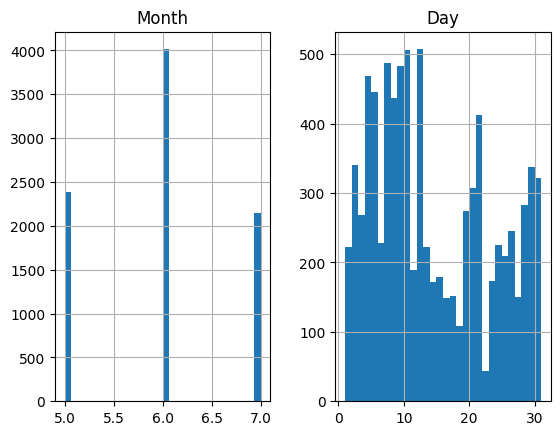

In [13]:
# Date : The exact date of the observation.
df['Date'].unique()

# Create New features for Deep Analysis purpose

# Month : The exact Month of the observation
df['Month'] = df['Date'].dt.month
# Day : The exact Day of the observation
df['Day'] = df['Date'].dt.day

# Distribution
df[['Month','Day']].hist(bins=30)

# Insights:
# There seems to be a cyclical pattern with both daily and monthly variations
# There's a notable spike at month 6.0, reaching approximately 4,000 units,The values at months 5.0 and 7.0 are lower, around 2,000-2,500 units.
# The highest activity appears between days 5-15, with several peaks around 500 units,There's a noticeable dip in activity around days 15-20,The latter part of the month (days 20-30) shows moderate activity with some fluctuation.


array(['06:19', '06:02', '07:21', '08:28', '09:26', '10:01', '07:09',
       '08:34', '07:22', '09:53', '10:10', '10:27', '10:43', '05:40',
       '08:17', '06:12', '05:31', '08:14', '10:31', '07:27', '07:11',
       '06:55', '06:38', '08:00', '10:09', '05:50', '09:22', '07:31',
       '06:50', '06:14', '05:49', '09:33', '08:45', '08:21', '07:18',
       '08:33', '06:27', '05:56', '07:54', '07:00', '08:59', '06:54',
       '06:29', '08:24', '07:30', '08:41', '08:48', '07:16', '06:04',
       '08:22', '06:46', '06:21', '07:19', '07:47', '07:33', '08:02',
       '07:01', '08:53', '05:53', '06:34', '06:36', '05:57', '07:29',
       '07:06', '08:12', '09:28', '08:43', '08:16', '07:23', '06:10',
       '06:16', '06:41', '07:36', '07:08', '06:53', '06:23', '07:53',
       '08:37', '07:37', '06:59', '09:10', '08:32', '05:59', '07:46',
       '09:01', '06:28', '05:55', '07:41', '08:42', '08:11', '07:50',
       '07:34', '07:17', '06:31', '05:47', '06:32', '06:00', '07:56',
       '07:07', '09:

array(['06:00', '07:00', '08:00', '09:00', '10:00', '05:00'], dtype=object)

<Axes: >

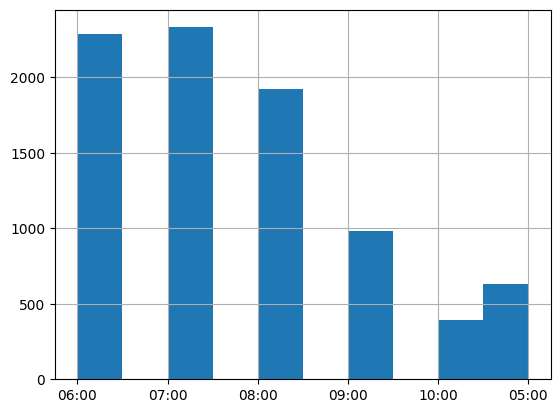

In [15]:
# Start Time : The start time of the observation session.
import datetime
# Extract only the time and minute components from the Time."
df['Start_Time'] = df['Start_Time'].apply(lambda x: x.strftime('%H:%M') if isinstance(x,datetime.time) else x)
display(df['Start_Time'].unique())

# create new feature

# Round_time :
# Using apply with a lambda function
df['Round_time'] = df['Start_Time'].apply(
    lambda x: '05:00' if '05:' in x else 
              '06:00' if '06:' in x else 
              '07:00' if '07:' in x else 
              '08:00' if '08:' in x else
              '09:00' if '09:' in x else
              '10:00' if '10:' in x else
              '11:00' if '11:' in x else
              'Other'
)
display(df['Round_time'].unique())
# Distribution
df['Round_time'].hist()

# Insights:
# The increase from 5:00 to 6:00 represents the morning ramp-up
# Highest activity occurs between 6:00-7:00 AM with approximately 2,200 units
# At 8:00 AM, there's a slight decline but still maintains high activity around 1,900 units
# Activity starts dropping significantly after 8:00 AM,By 9:00 AM, it's reduced to about 1,000 units,Further drops to around 400 units by 10:00 AM.

array(['06:29', '06:12', '07:31', '08:38', '09:36', '10:11', '07:19',
       '08:44', '07:32', '10:03', '10:20', '10:37', '10:53', '05:50',
       '08:27', '06:22', '05:41', '08:24', '10:41', '07:37', '07:21',
       '07:55', '06:48', '08:10', '10:19', '06:00', '09:32', '07:41',
       '07:00', '06:24', '05:59', '09:43', '08:55', '08:31', '07:28',
       '08:43', '06:37', '06:06', '08:04', '07:10', '09:09', '07:04',
       '06:39', '08:34', '07:40', '08:51', '08:58', '07:26', '06:14',
       '08:32', '06:56', '06:31', '07:29', '07:57', '07:43', '08:12',
       '08:45', '07:11', '09:03', '06:03', '06:44', '06:46', '06:07',
       '07:39', '07:16', '08:22', '09:38', '08:53', '08:26', '07:33',
       '06:20', '06:26', '06:51', '07:46', '07:18', '07:03', '06:33',
       '08:03', '08:47', '07:47', '07:09', '09:20', '08:42', '06:09',
       '07:56', '09:11', '06:38', '06:05', '07:51', '08:52', '08:21',
       '08:00', '07:44', '07:27', '06:41', '05:57', '06:42', '06:10',
       '08:06', '07:

array([10., 60., 11., 70., 12.])

<Axes: >

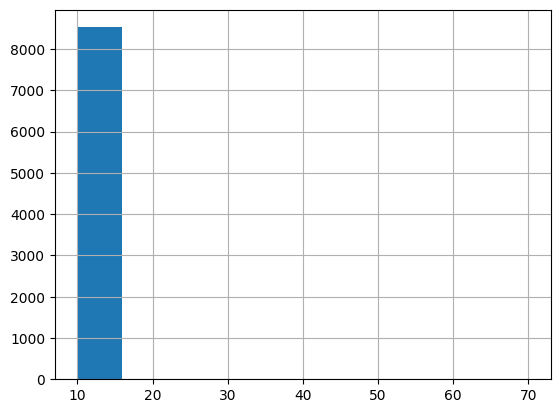

In [16]:
# End Time:The end time of the observation session.

# Extract only the time and minute components from the Time
df['End_Time']=df['End_Time'].apply(lambda x:x.strftime('%H:%M') if isinstance(x,datetime.time) else x)
display(df['End_Time'].unique())


# Creating the new feature 'Total_Observation_Duration'

# Assign values to the variables
start=pd.to_datetime(df['Start_Time'],format='%H:%M')
end=pd.to_datetime(df['End_Time'],format='%H:%M')

df['Total_Observation_Duration'] = (end-start).dt.total_seconds()/60
display(df['Total_Observation_Duration'].unique())

# Distribution
df['Total_Observation_Duration'].hist()

# Insights:
# a single data point around the value 10 on the x-axis, with a magnitude of approximately 8,000-8,500 units on the y-axis.The rest of the graph (from 20-70 on the x-axis) shows no activity or Outliers may deviate from regluar obsevation time.

array(['Elizabeth Oswald', 'Kimberly Serno', 'Brian Swimelar'],
      dtype=object)

<Axes: >

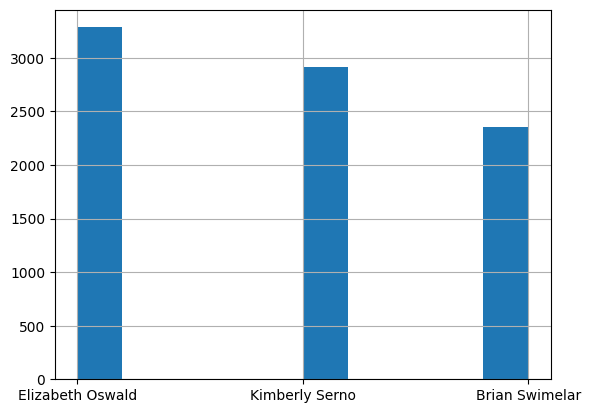

In [17]:
# Observer : The individual who conducted the observation.
display(df['Observer'].unique())

# Distribution
df['Observer'].hist()

# Insights:
# Elizabeth Oswald has the highest value,Approximately 3,200-3,300 units
# Kimberly Serno: Around 2,900 units
# Brian Swimelar: Roughly 2,300-2,400 units

array([1, 2])

<Axes: >

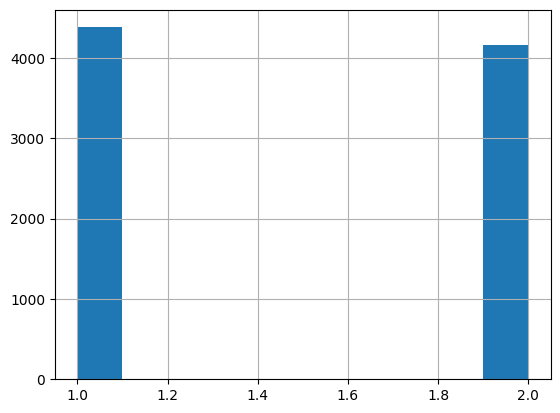

In [18]:
# Visit : The count of visits made to the same observation site or plot.

display(df['Visit'].unique())

# Distribution
df['Visit'].hist()

# Insights:
# data points at x-values 1.0 and 2.0, with similar heights of approximately 4,000-4,200 units each
# Both bars have nearly identical heights

array(['0-2.5 min', '2.5 - 5 min', '5 - 7.5 min', '7.5 - 10 min'],
      dtype=object)

<Axes: >

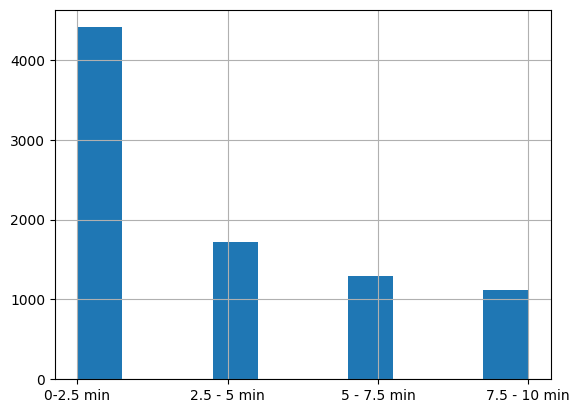

In [19]:
# Interval_Length : The duration of the observation interval (e.g., "0-2.5 min").
display(df['Interval_Length'].unique())

# Distribution
df['Interval_Length'].hist()

# Insights:
# This shows a clear negative trend across the time intervals.
# 0-2.5 minutes: Approximately 4,200-4,300 units,2.5-5 minutes: Drops to around 1,700 units,5-7.5 minutes: Further decreases to about 1,300 units,7.5-10 minutes: Continues to decline to roughly 1,100 units.

np.int64(0)

<Axes: >

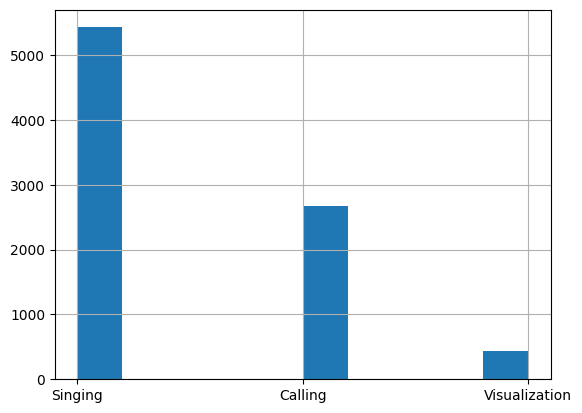

In [20]:
# ID_Method : The method used to identify the species

df['ID_Method'].unique()

# The feature contains null values; identify them for further analysis or handling
df[df['ID_Method'].isna()]
# The 'ID_Method' feature contains null values specifically for the 'Red-eyed Vireo' species
df[df['Common_Name']=='Red-eyed Vireo']
# The 'Red-eyed Vireo' species is identified using the 'singing' method.
df['ID_Method'] = df['ID_Method'].fillna('Singing')


display(df['ID_Method'].isna().sum())
df['ID_Method'].hist()


# insights:
# Singing is by far the most dominant activity.
# Calling is the second most common activity
# Visualization has significantly lower numbers compared to the other two activities

array(['<= 50 Meters', '50 - 100 Meters', nan], dtype=object)

array(['below 50', 'above 50', 'flyover'], dtype=object)

<Axes: >

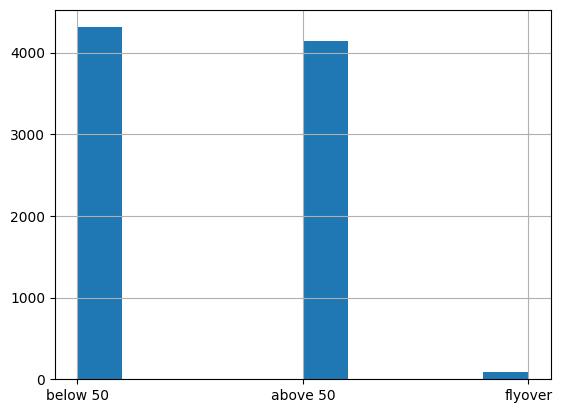

In [21]:
# Distance : The distance refers to how far the observed species is located from the observer

display(df['Distance'].unique())

# Display all rows to analysis
pd.set_option('display.max_rows',None)

# The feature contains null values.identify them for further analysis or handling
df[df['Distance'].isna()]
# There seems to be a pattern: when the 'Flyover' is true, the distance is marked as NaN. This could indicate that the distance wasn't measured, and the observation was based on visualization ('Visualization') only.
df[df['Flyover_Observed']==True]
# Based on the observed pattern, we can mark these instances as 'Flyover' where the distance is NaN, as it suggests the species was only visualized and not measured for distance.
df['Distance'] = df['Distance'].fillna('flyover')

# Replace the values
df['Distance'] = df['Distance'].map({'50 - 100 Meters':'above 50','<= 50 Meters':'below 50','flyover':'flyover'})
display(df['Distance'].unique())
df['Distance'].hist()


# Insights:
# There's a remarkably even distribution between "below 50" and "above 50" categories,Both major categories have values around 4,000+ units.
# The "flyover" category shows significantly lower numbers

array([0, 1])

<Axes: >

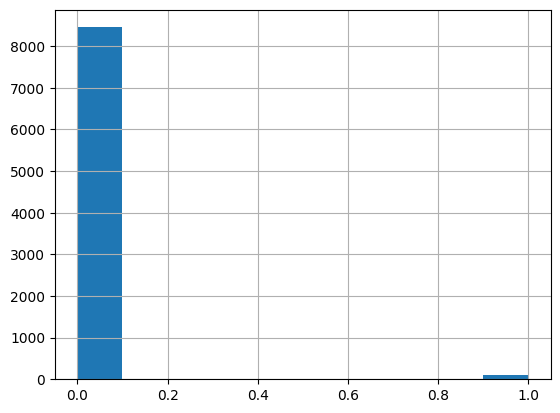

In [22]:
# Flyover Observed : The 'Flyover' feature indicates whether the bird was observed flying overhead during the observation period

# Replace the values
df['Flyover_Observed'] = df['Flyover_Observed'].map({True:1,False:0})
display(df['Flyover_Observed'].unique())

# Distribution
df['Flyover_Observed'].hist()

# Insights:
# More than 90% of the species observed without flyover .



In [23]:
# Sex : The sex of the observed bird species

display(df['Sex'].unique())

# Percentage of null values
display(df['Sex'].isna().sum()/len(df['Sex'])*100)

# This feature has 60% missing data, making it less informative. Therefore, it is appropriate to drop this column
df.drop(columns=['Sex'],axis=1,inplace=True)


array(['Undetermined', nan, 'Male'], dtype=object)

np.float64(60.64825649426633)

In [24]:
# Common_Name : The common name of the observed bird species
display(df['Common_Name'].unique())

array(['Eastern Towhee', 'White-breasted Nuthatch',
       'Red-bellied Woodpecker', 'Orchard Oriole', 'Northern Mockingbird',
       'Northern Cardinal', 'Horned Lark', 'Mourning Dove',
       'Field Sparrow', 'Carolina Wren', 'Carolina Chickadee',
       'Eastern Wood-Pewee', 'American Crow', 'Indigo Bunting',
       'Eastern Tufted Titmouse', 'Yellow Warbler', 'Eastern Bluebird',
       'Downy Woodpecker', 'Chipping Sparrow', 'Baltimore Oriole',
       'Great Crested Flycatcher', 'Blue-gray Gnatcatcher',
       'Cedar Waxwing', 'Blue Jay', 'American Goldfinch',
       'Red-winged Blackbird', 'Pileated Woodpecker',
       'Brown-headed Cowbird', 'Red-eyed Vireo', 'Unidentified Chickadee',
       'Acadian Flycatcher', 'Hairy Woodpecker', 'Yellow-throated Vireo',
       'Song Sparrow', 'Grasshopper Sparrow', 'Barn Swallow',
       'Wood Thrush', 'American Robin', 'Eastern Phoebe', 'House Finch',
       'Yellow-billed Cuckoo', 'Common Grackle', 'Scarlet Tanager',
       'Eastern Kingbir

In [25]:
# Scientific Name: The scientific name of the observed bird species
display(df['Scientific_Name'].unique())

array(['Pipilo erythrophthalmus', 'Sitta carolinensis',
       'Melanerpes carolinus', 'Icterus spurius', 'Mimus polyglottos',
       'Cardinalis cardinalis', 'Eremophila alpestris',
       'Zenaida macroura', 'Spizella pusilla', 'Thryothorus ludovicianus',
       'Poecile carolinensis', 'Contopus virens', 'Corvus brachyrhynchos',
       'Passerina cyanea', 'Baeolophus bicolor', 'Setophaga petechia',
       'Sialia sialis', 'Picoides pubescens', 'Spizella passerina',
       'Icterus galbula', 'Myiarchus crinitus', 'Polioptila caerulea',
       'Bombycilla cedrorum', 'Cyanocitta cristata', 'Spinus tristis',
       'Agelaius phoeniceus', 'Dryocopus pileatus', 'Molothrus ater',
       'Vireo olivaceus', 'Poecile', 'Empidonax virescens',
       'Picoides villosus', 'Vireo flavifrons', 'Melospiza melodia',
       'Ammodramus savannarum', 'Hirundo rustica', 'Hylocichla mustelina',
       'Turdus migratorius', 'Sayornis phoebe', 'Haemorhous mexicanus',
       'Coccyzus americanus', 'Quiscalus

In [26]:
# AcceptedTSN: The Taxonomic Serial Number for the observed species
display(df['AcceptedTSN'].unique())

# The feature contains null values.identify them for further analysis or handling
df[df['AcceptedTSN'].isna()]
# The null values in the 'AcceptedTSN' column are associated with the 'House Finch' species in the 'Common_Name' column
df[df['Common_Name']=='House Finch']
# We can obtain the 'AcceptedTSN' code for the bird species from online resources or databases, such as taxonomic reference websites or bird identification platforms
df['AcceptedTSN'] = df['AcceptedTSN'].fillna(997805)
display(df['AcceptedTSN'].isna().sum())

array([179276., 178775., 178195., 179064., 178620., 179124., 554256.,
       177125., 179443., 178581., 554383., 178359., 179731., 179150.,
       554138., 950039., 179801., 178259., 179435., 179083., 178309.,
       179853., 178532., 179680., 179236., 179045., 178166., 179112.,
       179021., 553526., 178339., 178262., 179009., 179492., 179333.,
       178448., 179777., 179759., 178329.,     nan, 177831., 179104.,
       179883., 178279., 950033., 176136., 950029., 178927., 178154.,
       178979., 179788., 950009., 178844., 178850., 178541., 950079.,
       178627., 178625., 178944., 950041., 179737., 175122., 174793.,
       178119., 950049., 179023., 175359., 554382., 950010., 174999.,
       950042., 174773., 177921., 178991., 950045., 179488., 174717.,
       179724., 175063., 178443., 178032., 178001., 178937., 175590.,
       175272., 178964., 950011., 179637., 179628., 179410., 175265.,
       175604., 179034., 179796., 950052., 950036., 950061., 847323.,
       950031., 9500

np.int64(0)

In [27]:
# NPSTaxonCode: A unique code assigned to the taxon of the species
display(df['NPSTaxonCode'].unique())

array([ 83803,  90935,  84865,  93634,  88394,  94228, 264079,  82737,
        84790,  88350, 265876,  85846,  87106,  94257, 266957, 773778,
        87184,  84936,  84781,  93655,  85791,  88038,  88296,  86252,
        95300,  93613,  84833,  94215,  93587, 263793,  85824,  85739,
        93573,  85643,  83867,  87409,  87156,  87136,  85813, 926917,
        89102,  94206,  88071,  85757, 890949,  86451, 773816,  92689,
        84820,  92746,  87168, 773814,  91012,  91019,  88306, 892360,
        89979,  89977,  92708, 773819,  87112,  77836,  84438,  83980,
       890944,  93589,  79572, 265874, 773765,  76625, 773822,  84416,
        82956,  93552, 890952,  85638,  83419,  87098,  77770,  87404,
        83884,  83046,  92700,  81838,  79476,  92730, 892161,  86204,
        86194,  84754,  79468,  81854,  93601,  87177, 890945, 890943,
       890946, 816311, 773818, 773779, 774021,  88076,  77646,  85755,
       773768, 773770,  84855,  79563])

In [28]:
# AOU_Code
display(df['AOU_Code'].unique())

array(['EATO', 'WBNU', 'RBWO', 'OROR', 'NOMO', 'NOCA', 'HOLA', 'MODO',
       'FISP', 'CARW', 'CACH', 'EAWP', 'AMCR', 'INBU', 'ETTI', 'YEWA',
       'EABL', 'DOWO', 'CHSP', 'BAOR', 'GCFL', 'BGGN', 'CEDW', 'BLJA',
       'AMGO', 'RWBL', 'PIWO', 'BHCO', 'REVI', 'UNCH', 'ACFL', 'HAWO',
       'YTVI', 'SOSP', 'GRSP', 'BARS', 'WOTH', 'AMRO', 'EAPH', 'HOFI',
       'YBCU', 'COGR', 'SCTA', 'EAKI', 'NOPA', 'WITU', 'HOWA', 'OVEN',
       'NOFL', 'AMRE', 'SWTH', 'LOWA', 'BAWW', 'WEWA', 'HOWR', 'CERW',
       'BRTH', 'GRCA', 'COYE', 'BLPW', 'FICR', 'WODU', 'GRHE', 'BEKI',
       'YTWA', 'WAVI', 'RSHA', 'BCCH', 'NOWA', 'CANG', 'BTBW', 'GBHE',
       'BADO', 'WEVI', 'PIWA', 'SWSP', 'DCCO', 'UNCR', 'MALL', 'NRWS',
       'RTHU', 'CHSW', 'KEWA', 'OSPR', 'BLVU', 'YBCH', 'BWWA', 'EUST',
       'HOSP', 'DEJU', 'TUVU', 'PEFA', 'EAME', 'VEER', 'PRAW', 'BBWA',
       'BTNW', 'UNWO', 'CMWA', 'YRWA', 'MAWA', 'SUTA', 'KILL', 'UNFL',
       'NAWA', 'TEWA', 'RHWO', 'RTHA'], dtype=object)

array([0, 1])

<Axes: >

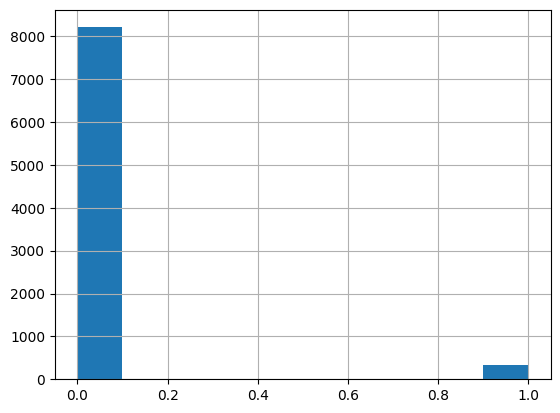

In [29]:
# PIF_Watchlist_Status: This feature indicates whether the species is listed on the Partners in Flight Watchlist, with 'TRUE' signifying that the species is at risk

# Replace the values
df['PIF_Watchlist_Status'] = df['PIF_Watchlist_Status'].map({True:1,False:0})
display(df['PIF_Watchlist_Status'].unique())

# Distribution
df['PIF_Watchlist_Status'].hist()

# Insights:
# The plot show there are less count of species at the risk

array([1, 0])

<Axes: >

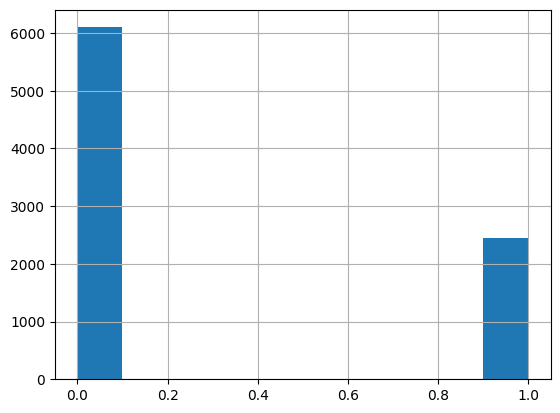

In [30]:
# Regional_Stewardship_Status: This feature indicates the conservation priority within the region, where 'TRUE' denotes a high-priority species for conservation efforts

# Replace the values
df['Regional_Stewardship_Status'] = df['Regional_Stewardship_Status'].map({True:1,False:0})
display(df['Regional_Stewardship_Status'].unique())

# Ditribution
df['Regional_Stewardship_Status'].hist()

# Insights:
# The plot shows approximatly 2500 species at the risk and most of the species no need priority in regional wise

array([19.9, 20.8, 21.7, 28.5, 27.5, 26.1, 14. , 27.3, 23.8, 26.2, 26.5,
       25.5, 25.9, 22.9, 22.4, 17.9, 21.3, 25.1, 15.5, 15.6, 15.4, 14.8,
       24.3, 29.6, 24.1, 22.6, 18.8, 17.8, 16.5, 16.4, 24.5, 23.6, 22.3,
       23.2, 22. , 21.5, 17.5, 17.6, 19.5, 18.4, 18.6, 19.6, 18. , 21.6,
       17.4, 17. , 16.6, 16. , 24.9, 28. , 17.2, 17.1, 17.3, 20.7, 24.6,
       23. , 21.9, 20.6, 20.5, 22.5, 19.4, 21.2, 27. , 23.1, 25.2, 23.5,
       23.7, 22.7, 22.1, 22.8, 21.8, 21.4, 22.2, 15.2, 13.8, 14.5, 18.2,
       19.7, 19. , 21. , 21.1, 18.5, 17.7, 19.2, 15. , 14.4, 19.3, 18.3,
       18.7, 20.4, 16.8, 18.1, 20.9, 25.3, 15.1, 13.9, 18.9, 23.4, 24.2,
       26.3, 27.2, 19.1, 20. , 23.3, 19.8, 16.9, 24.4, 24. , 26.7, 26.9,
       25.6, 20.3, 25.4, 20.1, 25. , 30.6, 30.5, 24.7, 30. , 32.1, 33.6,
       25.7, 34.4, 27.1, 31. , 27.8, 33. , 31.2, 29.4, 27.6, 26. , 26.4,
       28.2, 11.2, 11. , 29.2, 24.8, 16.1, 23.9, 28.4, 28.6, 14.3, 16.7,
       20.2, 29.3, 27.4, 29. , 26.6, 25.8, 27.9, 28

<Axes: >

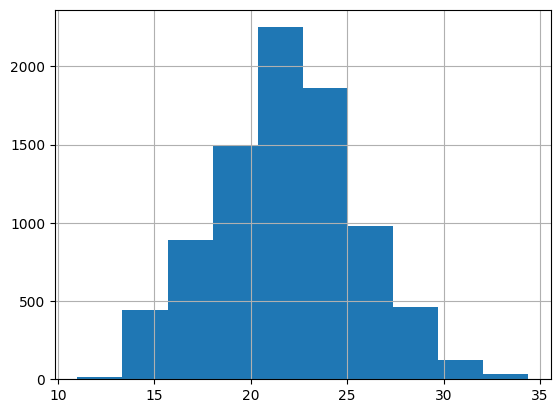

In [31]:
# Temperature: This feature represents the temperature (in degrees) recorded at the time of the observation

# Set the floating-point precision limit
df['Temperature'] = df['Temperature'].apply(lambda x: f"{x:.2f}")
# Change Dtype
df['Temperature'] = df['Temperature'].astype(float)
display(df['Temperature'].unique())

# Distribution
df['Temperature'].hist()

# We can see the data is normally distributed most of the data points falls within 16 - 26 .

array([79.4, 72.2, 75.8, 66. , 62.9, 61.2, 87.4, 52.9, 57.9, 68.6, 66.5,
       55.2, 68.1, 78.8, 71.5, 58.5, 69.5, 67.9, 89.8, 89.4, 91.8, 90.9,
       52.4, 49.6, 70. , 64. , 73. , 78.2, 69.1, 73.8, 72. , 77.5, 78.7,
       69.8, 67.5, 66.4, 69.7, 86.7, 77. , 74.3, 82.7, 82.8, 67.7, 92.3,
       89.7, 90.6, 84.7, 80.4, 62.3, 71.4, 71.8, 72.1, 76.8, 76.9, 59.8,
       76.3, 70.2, 57. , 83.3, 83.7, 84.6, 86.8, 73.2, 72.6, 58. , 50.1,
       51.8, 64.4, 77.3, 78.4, 83.4, 71.3, 71.9, 64.7, 73.4, 63.6, 71.2,
       68.4, 74.1, 76.1, 83.5, 84. , 84.3, 89.2, 87. , 88.4, 81.5, 79. ,
       83.1, 76.4, 87.7, 81.8, 85. , 86.3, 87.3, 81.9, 78.6, 74.2, 68.7,
       78.5, 71.7, 76.6, 90.7, 89.1, 92.4, 90. , 85.1, 85.2, 84.2, 93.3,
       91.5, 89.9, 71. , 68. , 88. , 80.7, 79.7, 82. , 83.8, 85.7, 87.8,
       87.2, 82.5, 82.2, 73.1, 75.5, 68.5, 80.2, 73.5, 81.1, 75.9, 76.2,
       78. , 93.4, 91.2, 94.1, 93.8, 94.6, 78.1, 80.5, 85.4, 84.1, 85.3,
       80.9, 80.6, 75.2, 85.5, 82.6, 61.9, 88.9, 86

<Axes: >

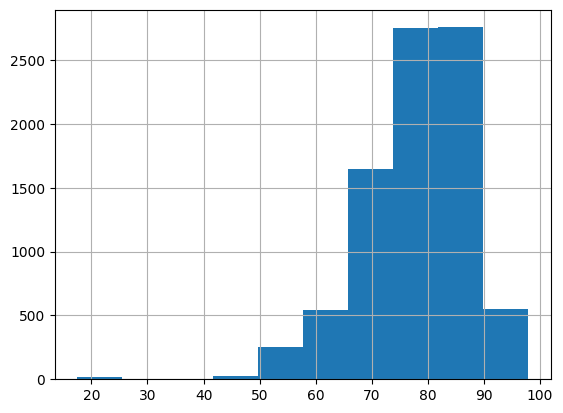

In [32]:
# Humidity: The humidity percentage recorded at the time of observation

# Set the floating-point precision limit
df['Humidity']  = df['Humidity'].apply(lambda x: f"{x:.2f}")
# Change Dtype
df['Humidity']  = df['Humidity'].astype(float)
display(df['Humidity'].unique())

# Distribution
df['Humidity'].hist()

# Insights:
# The Humidity data has left side skew .that means there some outliers in lower bound .we have to investigate further

array(['Cloudy/Overcast', 'Mist/Drizzle', 'Partly Cloudy',
       'Clear or Few Clouds', 'Fog'], dtype=object)

<Axes: >

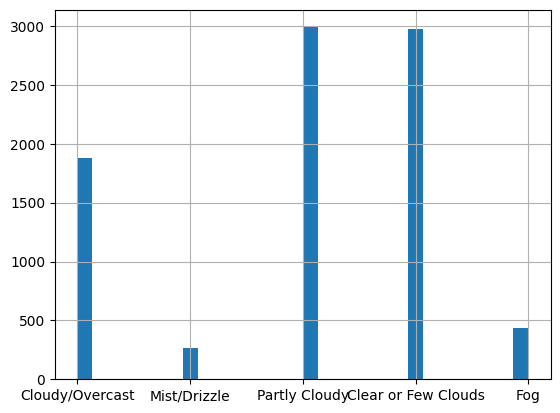

In [33]:
# Sky: The sky condition at the time of observation

display(df['Sky'].unique())

# Distribution
df['Sky'].hist(bins=30)

# Insights:
# The Partly Cloudy,Clear or Few Clouds and Cloudy/Overcast dominates the weather .
# Mist/Drizzle,Fog it apperars rarely 

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_1076\1907929767.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Wind'] = df['Wind'].replace({'Calm (< 1 mph) smoke rises vertically':1,'Light air movement (1-3 mph) smoke drifts':3,'Light breeze (4-7 mph) wind felt on face':7,'Gentle breeze (8-12 mph), leaves in motion':12})


array([ 1,  3,  7, 12])

<Axes: >

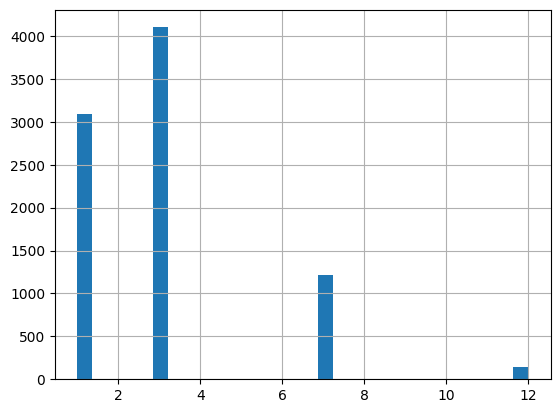

In [34]:
# Wind: The wind condition at the time observation

# Replace the values
df['Wind'] = df['Wind'].replace({'Calm (< 1 mph) smoke rises vertically':1,'Light air movement (1-3 mph) smoke drifts':3,'Light breeze (4-7 mph) wind felt on face':7,'Gentle breeze (8-12 mph), leaves in motion':12})
# change Dtype
df['Wind'] = df['Wind'].astype(int)
display(df['Wind'].unique())

# Distribution
df['Wind'].hist(bins=30)

# Insights:
# Most of the wind speed at 3mph followed by 1mph .it may be general speed 
# 7mph and 12mph very  rarely appper .it may be climate change

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_1076\3975010286.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Disturbance'] = df['Disturbance'].replace({'No effect on count':0,'Moderate effect on count':2,'Slight effect on count':1,'Serious effect on count':3})


array([0, 2, 1, 3])

<Axes: >

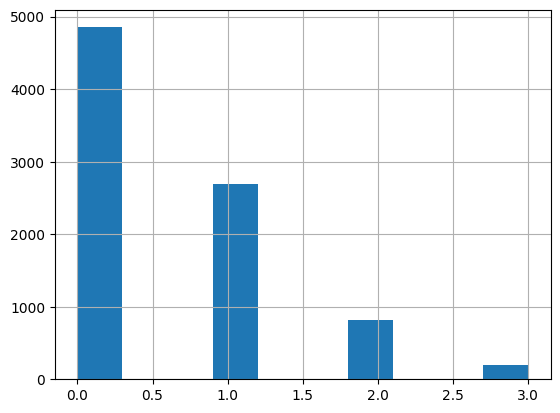

In [35]:
# Disturbance: Note any disturbances that could affect the observation

# Replace the values
df['Disturbance'] = df['Disturbance'].replace({'No effect on count':0,'Moderate effect on count':2,'Slight effect on count':1,'Serious effect on count':3})
# change Dtype
df['Disturbance'] = df['Disturbance'].astype(int)
display(df['Disturbance'].unique())

# Distribution
df['Disturbance'].hist()

# insights:
# Strong negative trend from left to right
# Each subsequent bar is approximately half or less than the previous one


array([1, 0])

<Axes: >

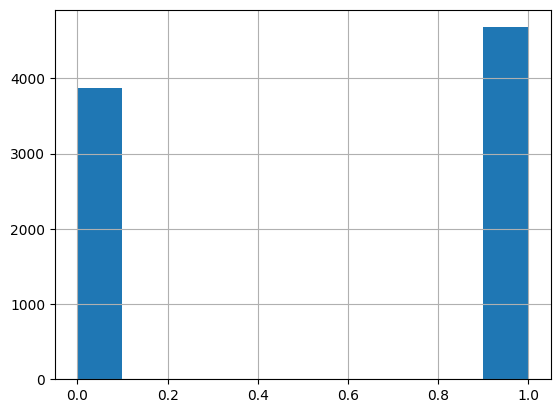

In [36]:
# Initial_Three_Min_Cnt: The species recorded in the first three minutes of the session

# Replace the values
df['Initial_Three_Min_Cnt'] = df['Initial_Three_Min_Cnt'].map({True:1,False:0})
display(df['Initial_Three_Min_Cnt'].unique())

# Distribution
df['Initial_Three_Min_Cnt'].hist()

# Insights:
# Over 4500 species observed first three minutes .it may related with count of intervel length 0-2.5

In [37]:
# Save the Cleaned dataset
df.to_csv('Forest processed dataset.csv')
print('the file has been saved')

the file has been saved


EDA

In [38]:
pd.set_option('display.max_columns',None)

df.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Month,Day,Round_time,Total_Observation_Duration
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19,06:29,Elizabeth Oswald,1,0-2.5 min,Singing,below 50,0,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,0,1,19.9,79.4,Cloudy/Overcast,1,0,1,5,22,06:00,10.0
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19,06:29,Elizabeth Oswald,1,0-2.5 min,Calling,below 50,0,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,0,0,19.9,79.4,Cloudy/Overcast,1,0,1,5,22,06:00,10.0
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19,06:29,Elizabeth Oswald,1,2.5 - 5 min,Calling,above 50,0,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,0,0,19.9,79.4,Cloudy/Overcast,1,0,0,5,22,06:00,10.0
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19,06:29,Elizabeth Oswald,1,2.5 - 5 min,Singing,below 50,0,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,0,0,19.9,79.4,Cloudy/Overcast,1,0,0,5,22,06:00,10.0
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19,06:29,Elizabeth Oswald,1,2.5 - 5 min,Visualization,below 50,0,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,0,0,19.9,79.4,Cloudy/Overcast,1,0,0,5,22,06:00,10.0


In [39]:
# Numerical Values
df.describe()

,Year,Date,Visit,Flyover_Observed,AcceptedTSN,NPSTaxonCode,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Wind,Disturbance,Initial_Three_Min_Cnt,Month,Day,Total_Observation_Duration
count,8546.0,8546,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000
mean,2018.0,2018-06-12 21:17:23.856775168,1.487245,0.010765,247363.500351,137088.791013,0.039551,0.286099,21.871507,77.757033,2.991341,0.571729,0.547508,5.971098,14.033817,10.130938
min,2018.0,2018-05-07 00:00:00,1.000000,0.000000,174717.000000,76625.000000,0.000000,0.000000,11.000000,17.500000,1.000000,0.000000,0.000000,5.000000,1.000000,10.000000
25%,2018.0,2018-05-29 00:00:00,1.000000,0.000000,178359.000000,85846.000000,0.000000,0.000000,19.400000,72.500000,1.000000,0.000000,0.000000,5.000000,7.000000,10.000000
50%,2018.0,2018-06-12 00:00:00,1.000000,0.000000,179021.000000,88350.000000,0.000000,0.000000,21.900000,78.800000,3.000000,0.000000,1.000000,6.000000,12.000000,10.000000
75%,2018.0,2018-07-01 00:00:00,2.000000,0.000000,179759.000000,94215.000000,0.000000,1.000000,24.300000,84.300000,3.000000,1.000000,1.000000,7.000000,21.000000,10.000000
max,2018.0,2018-07-15 00:00:00,2.000000,1.000000,997805.000000,926917.000000,1.000000,1.000000,34.400000,97.900000,12.000000,3.000000,1.000000,7.000000,31.000000,70.000000
std,0.0,NaN,0.499867,0.103202,183296.015291,154932.276585,0.194912,0.451963,3.652511,9.296123,2.243079,0.754199,0.497767,0.727771,8.801333,2.438584


In [ ]:
df.describe(include=['object'])


,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Start_Time,End_Time,Observer,Interval_Length,ID_Method,Distance,Common_Name,Scientific_Name,AOU_Code,Sky,Round_time
count,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546
unique,11,70,408,1,282,283,3,4,3,3,108,108,108,5,6
top,PRWI,CHOH 1,CHOH-0812,Forest,06:50,07:00,Elizabeth Oswald,0-2.5 min,Singing,below 50,Red-eyed Vireo,Vireo olivaceus,REVI,Partly Cloudy,07:00
freq,2463,420,42,8546,107,107,3285,4410,5431,4310,694,694,694,2989,2331


In [ ]:
pd.crosstab()

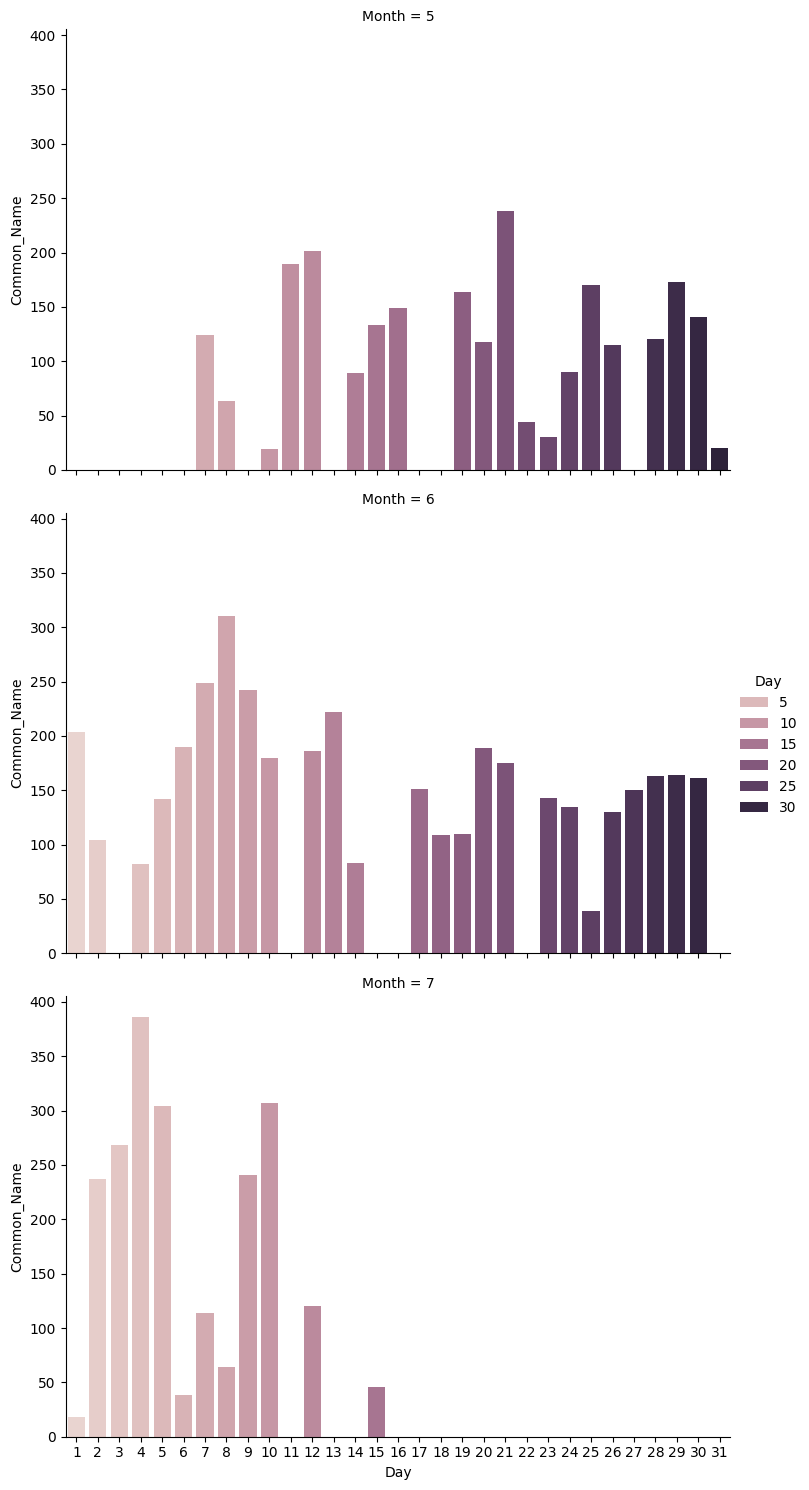

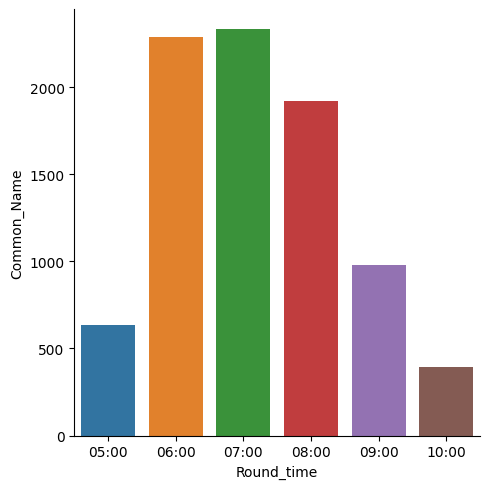

In [47]:
# 1.Temporal Analysis

# Seasonal Trends: Analyze the Date and Year columns to detect patterns in bird sightings across different seasons or years.
bird_sightings = df.groupby(['Month','Day']).agg({'Common_Name':'count'})
sns.catplot(data=bird_sightings,x='Day',y='Common_Name',row='Month',kind='bar',hue='Day',aspect=1.5)

# Observation Time: Study the Start_Time and End_Time to determine if specific time windows correlate with higher bird activity.
Higher_activity = df.groupby('Round_time').agg({'Common_Name':'count'})
sns.catplot(data=Higher_activity,x='Round_time',y='Common_Name',hue='Round_time',kind='bar')

# Insights:

# 1.Missing Data in July After the 15th:
# It's clear that there is no data for the seventh month after the 15th. This could indicate a gap in data collection or a period when bird activity was not recorded.The missing data in July and the consistent drop in activity after the 20th.
# 2.Peak Activity Before the 20th:
# Most of the bird activity (higher counts of Common_Name) occurs before the 20th of each month. This is consistent across the months shown.
# 3.General Trends After the 20th:
# After the 20th, the bird activity appears to decline or follow a more generalized, less pronounced pattern. This could suggest that bird activity decreases as the month progresses or that the dataset captures fewer observations during this period.

# The higher bird activity in 6:00,7:00 and 8:00 clock getting slightly lower after that Each subsequent bar is approximately half or less than the previous one.

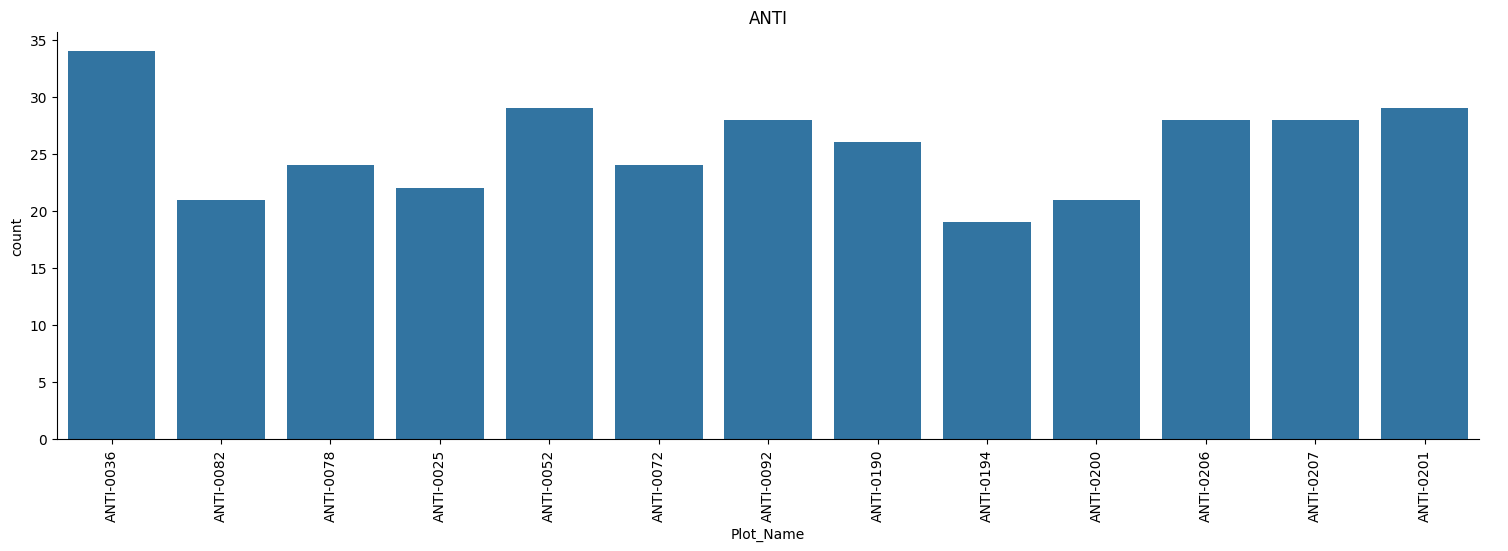

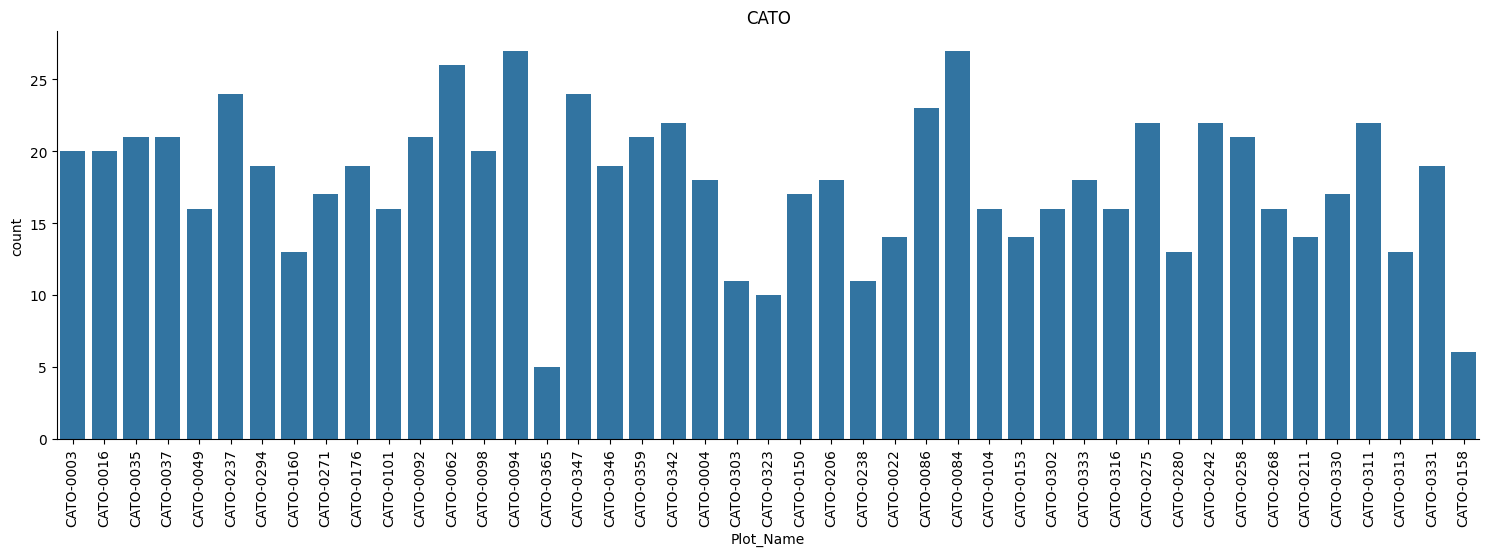

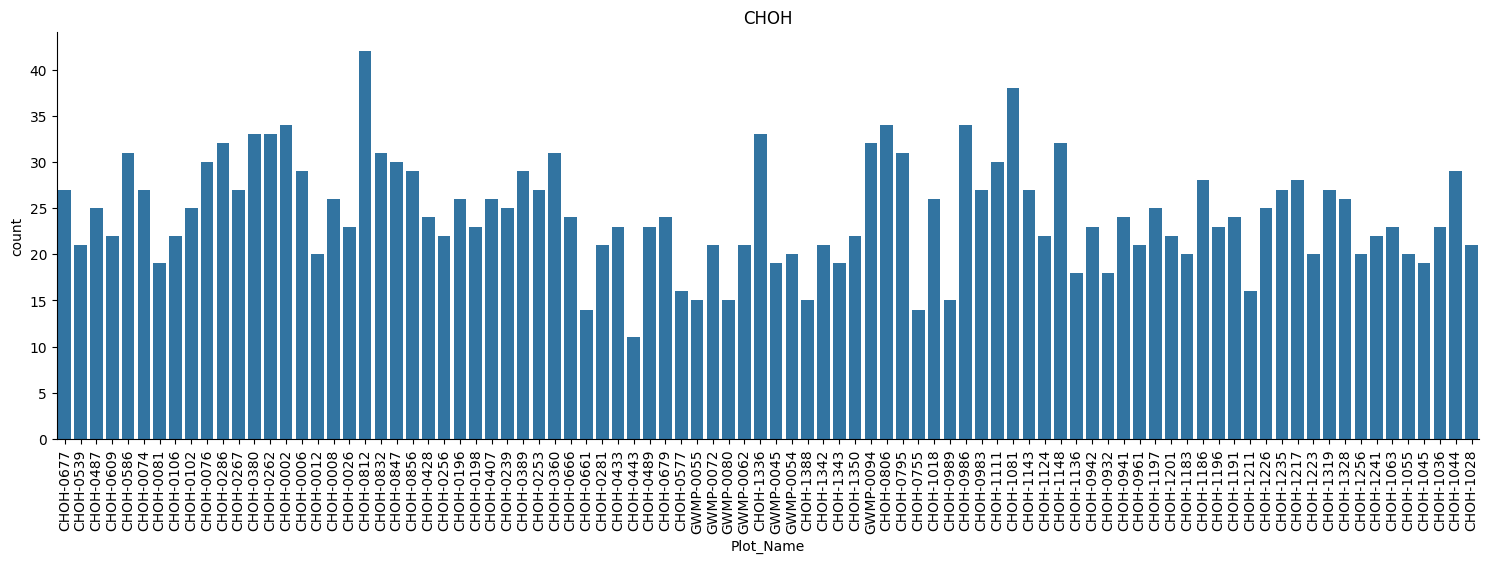

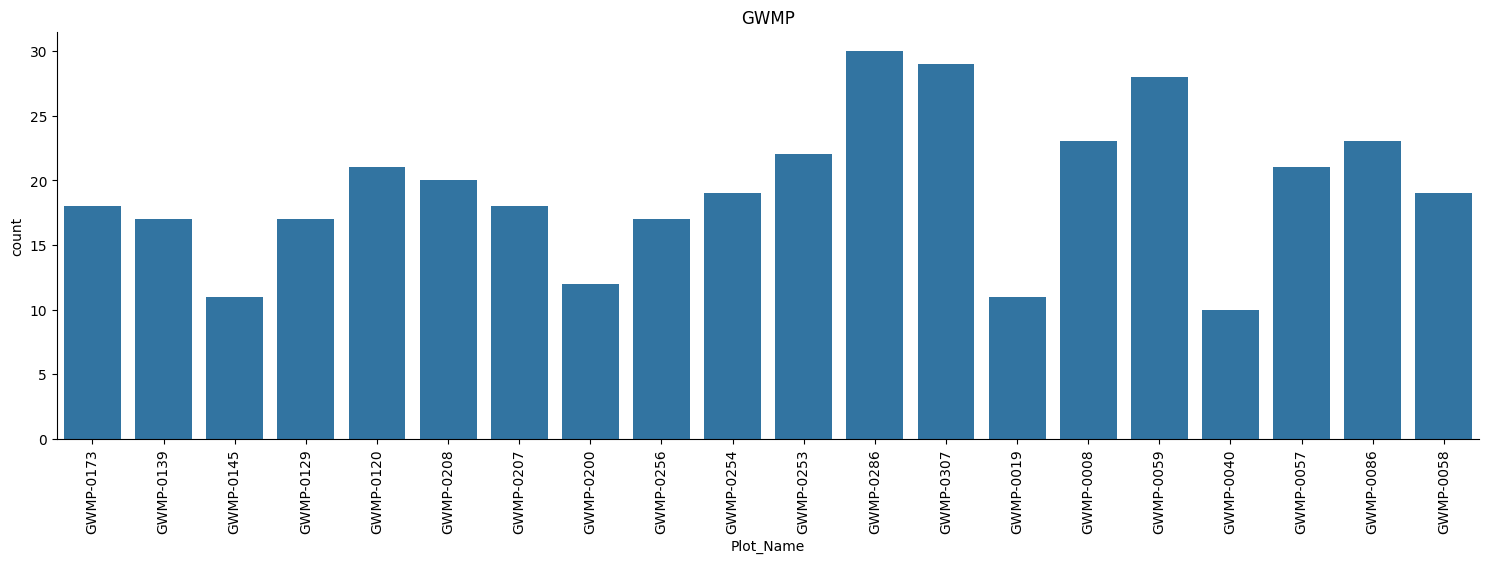

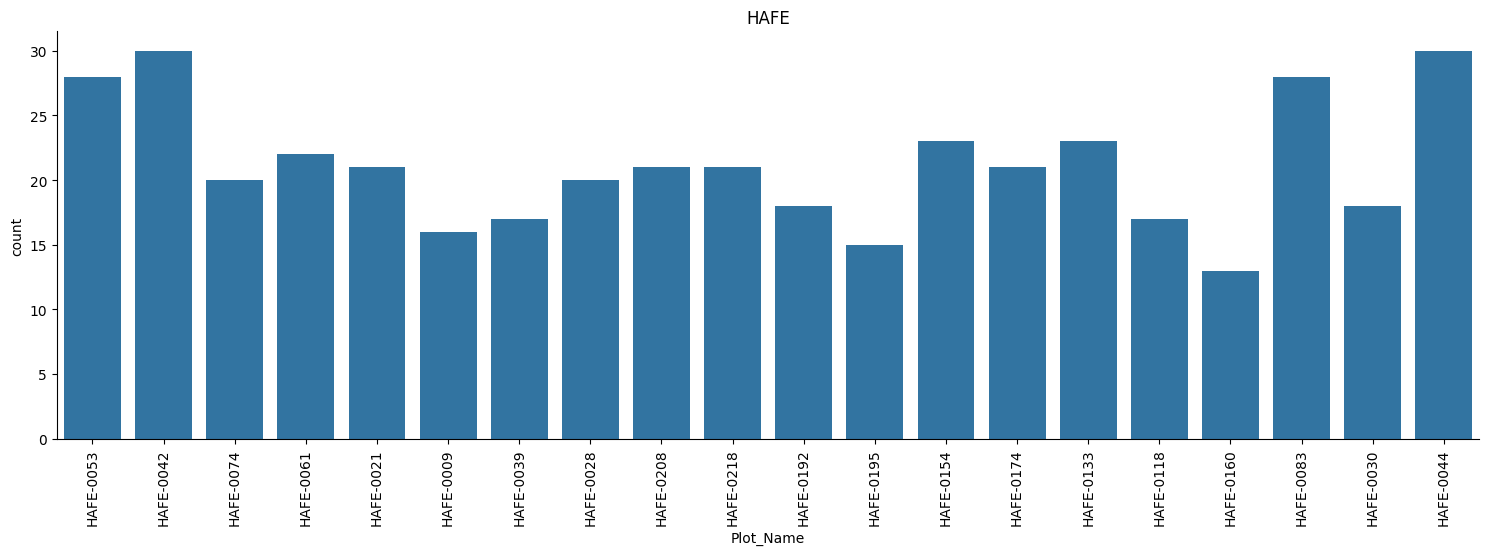

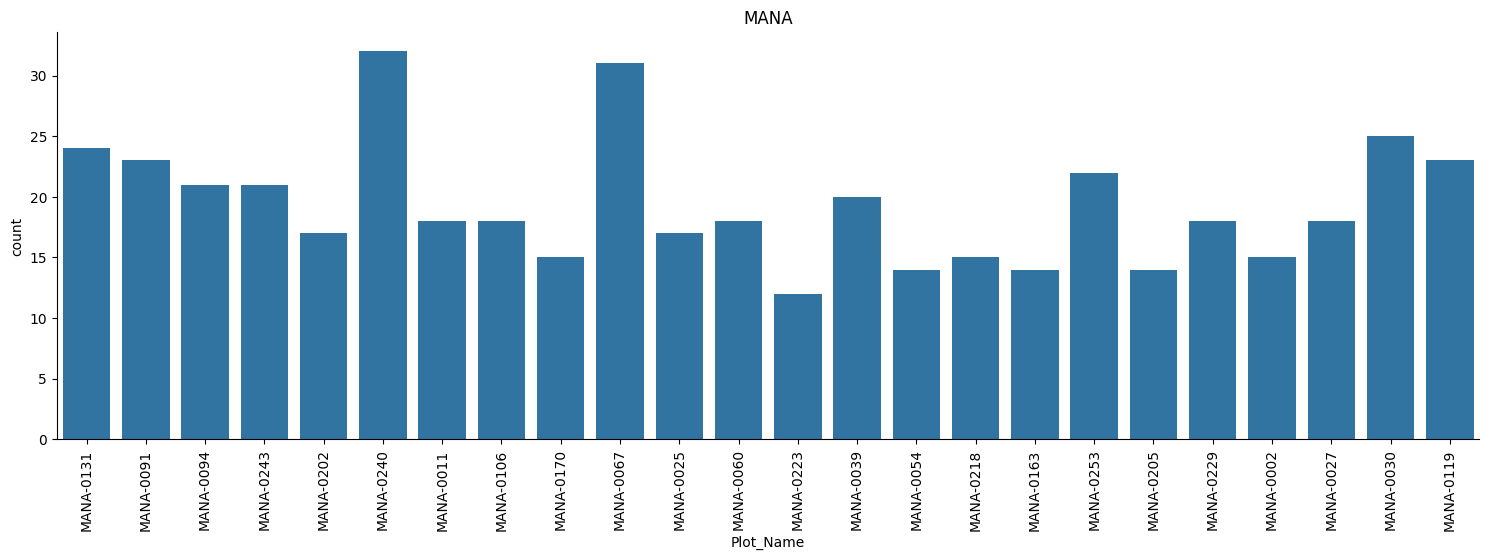

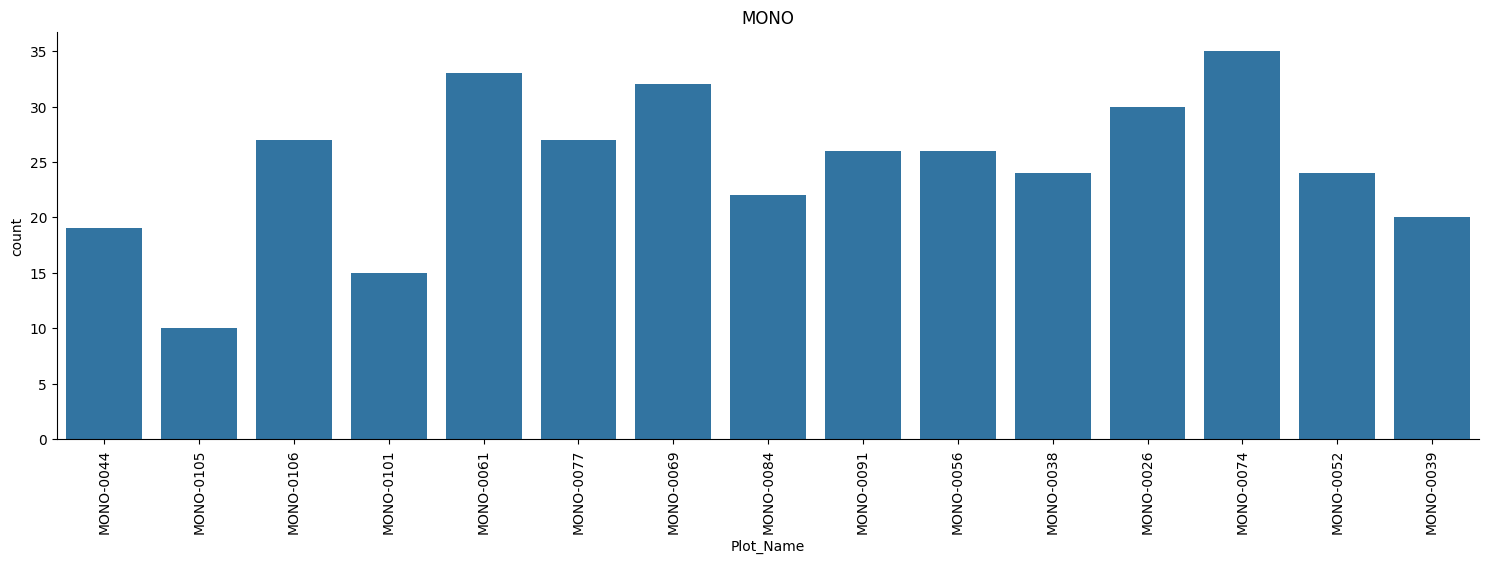

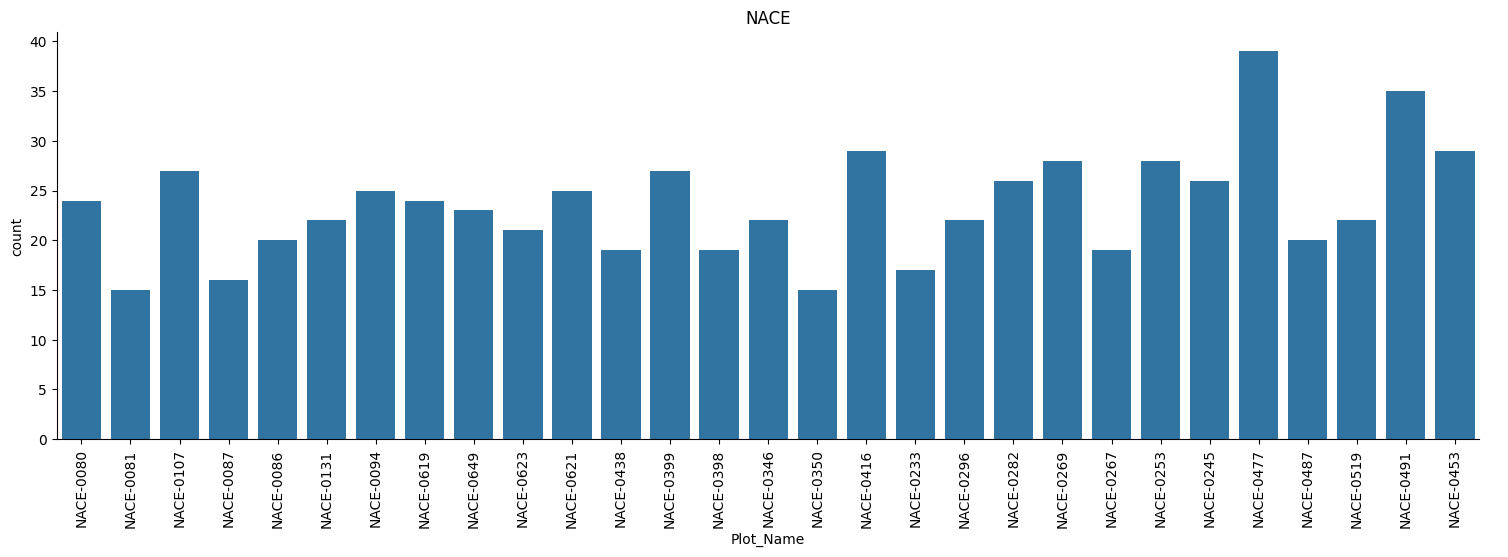

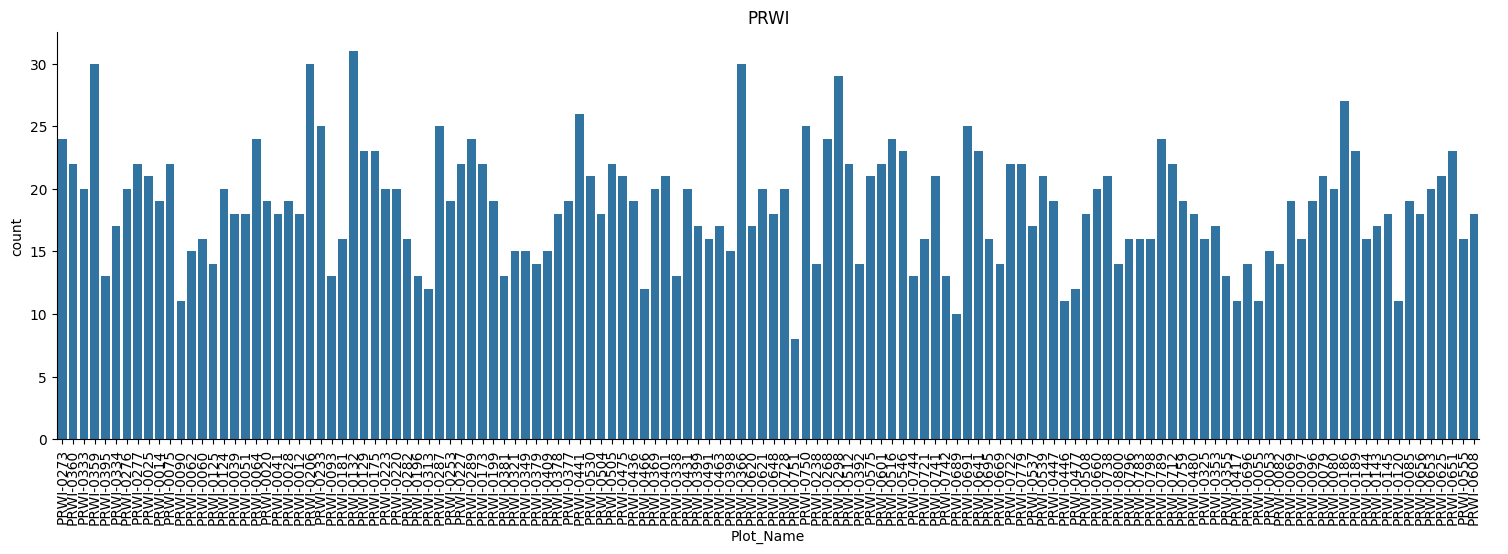

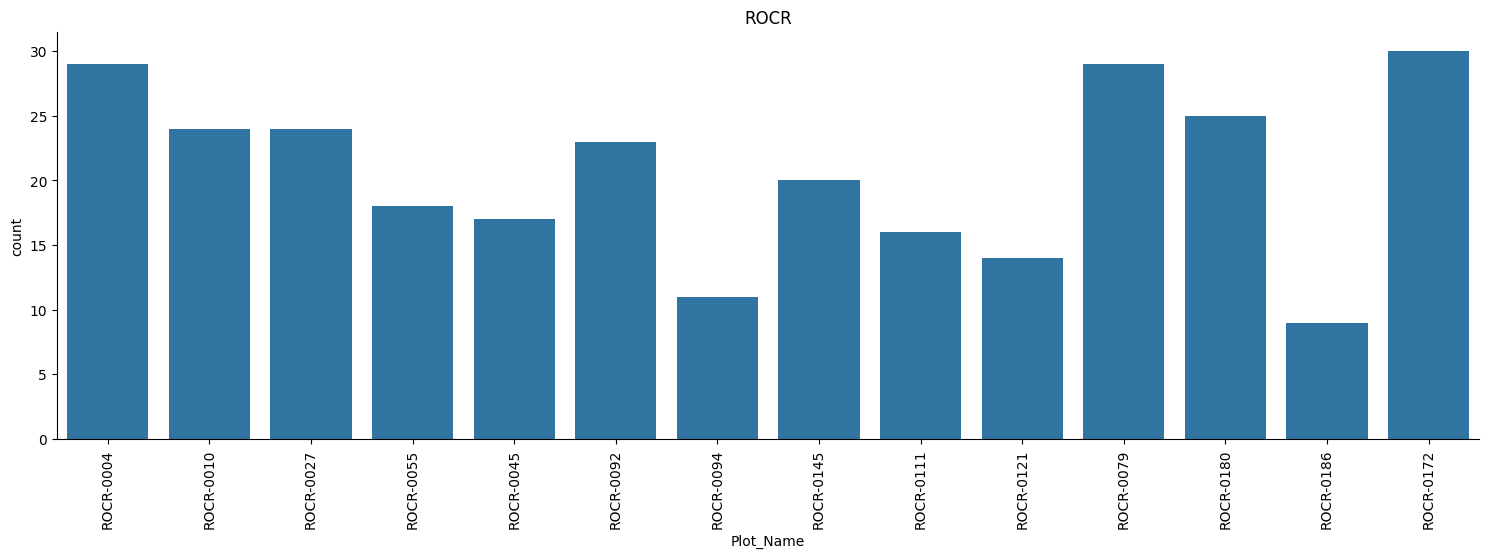

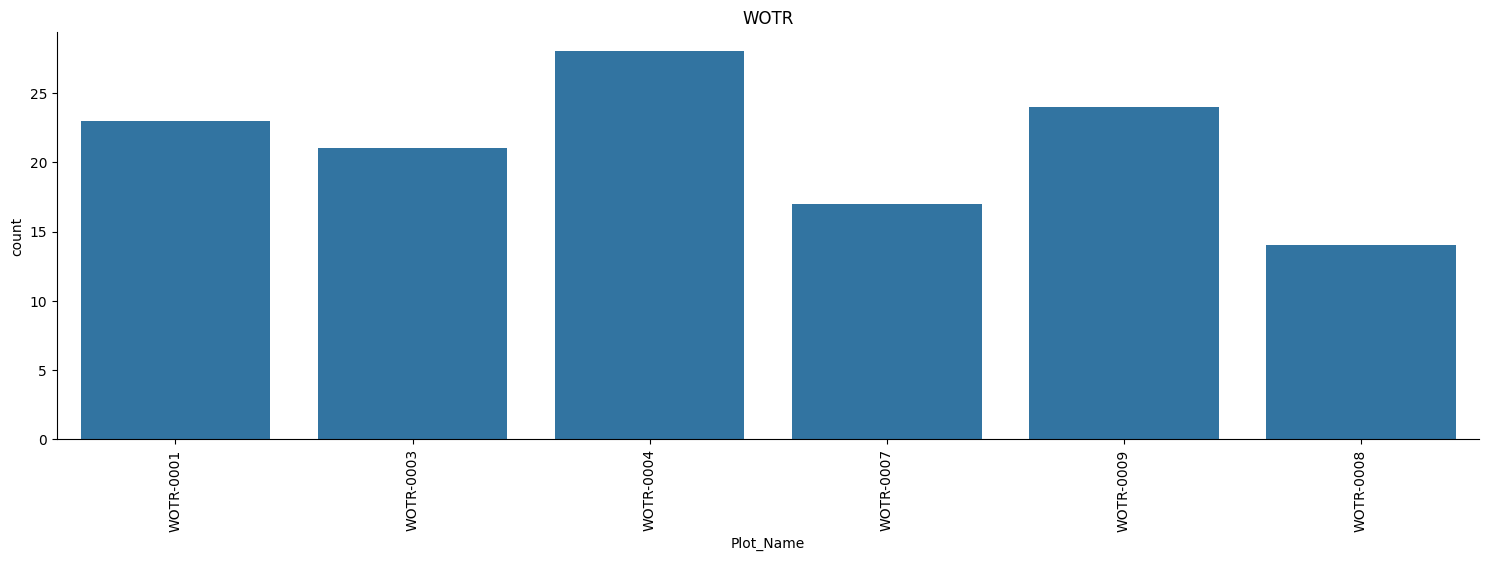

In [48]:
# 2.Spatial Analysis

# Location Insights: Group data by Location_Type (e.g., Grassland) to identify biodiversity hotspots.
#Plot-Level Analysis: Compare observations across different Plot_Name to see which plots attract more species or specific kinds of birds.

#Spatial = df.groupby(['Admin_Unit_Code','Plot_Name']).agg({'Common_Name':'count'})
for admin_unit_code in df['Admin_Unit_Code'].unique():
    # Filter the DataFrame for the current Admin_Unit_Code
    spatial_df = df[df['Admin_Unit_Code'] == admin_unit_code]
    # Create the catplot
    sns.catplot(data=spatial_df,x='Plot_Name',kind='count',col='Location_Type',aspect=3)
    plt.title(f'{admin_unit_code}')
    plt.xticks(rotation=90)
    plt.show()

# Inights:

# ANTI: There are no significant diffrence between plots.but,'ANTI-0036' slightly higher than others
# CATO: there are few plots higher bird activity 'Cato-0237,0062,0098,0347,0086,0084 etc'.but , there are significant drops on ' 0365,0158 '.
# CHOH: The plot 0812 is higher than others and '1336,1081,0094 etc' few plots followed by that and others also same .but, the plot no 0443 is very lower compare than others.
# GWMP: The plots '0286,0307,0059' higher birds activity .'0019,0040' are very lower than others
# HAFE: There are few plots are highers'0042,0044,0053,0083'. other almost same 
# MANA: there are two plots have higher bird activity '0240,0067'.others almost same distribution
# MONO: there are no significant diffrence between plots . but, a one plots is very low '0105'.
# NACE: There is one plots has higher bird activity then othere ' 0477' and '0491' followed it and others almost same 
# PRWI: There are few plots have higher bird activity '0359,0206,0132,0398,0298,0366,0189' and '0751' is only less activity plot .others plots almost same
# ROCR: There are three plots have higher '0172,0079,0004'. and '0186' has very lowe higher activity lvel
# WOTR: The '0004' is slightly higer than others. 

Text(0.5, 1.0, 'Activity Patterns')

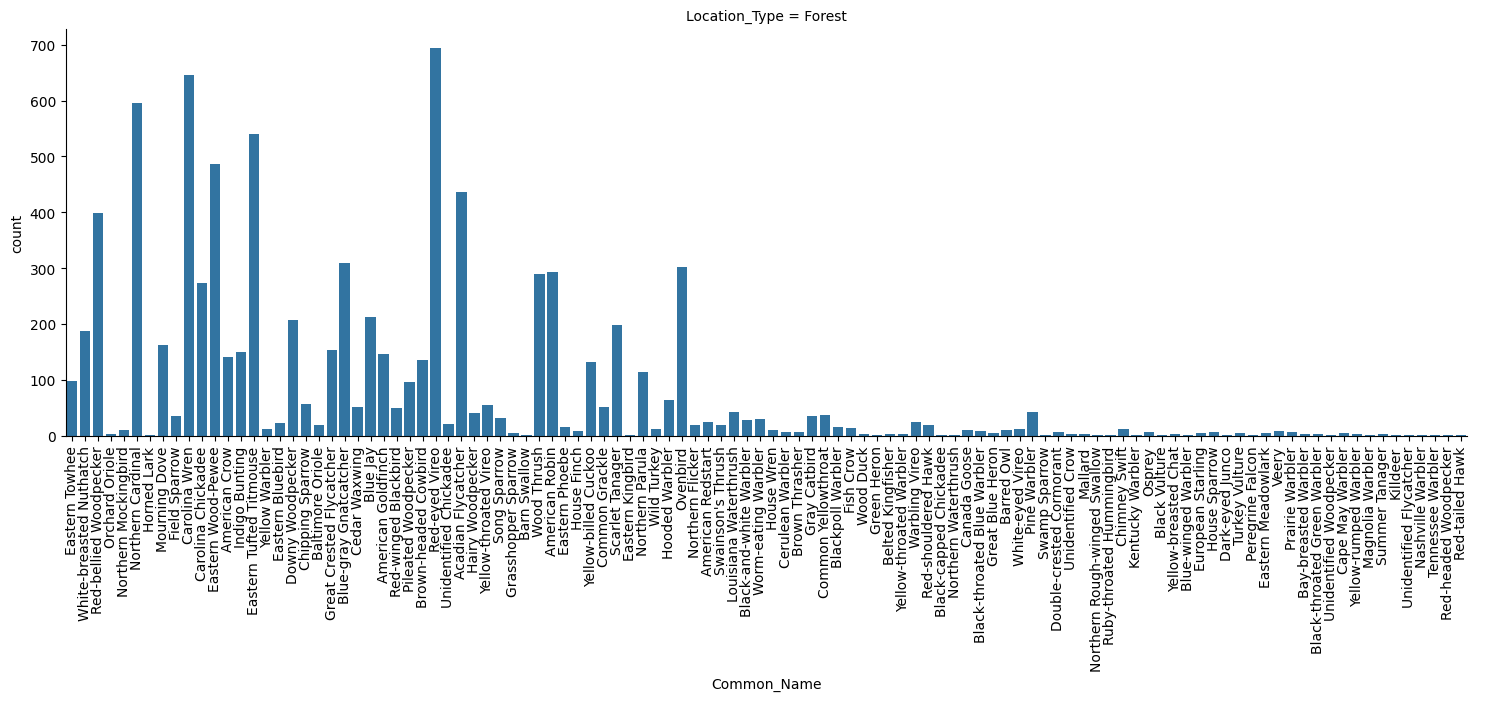

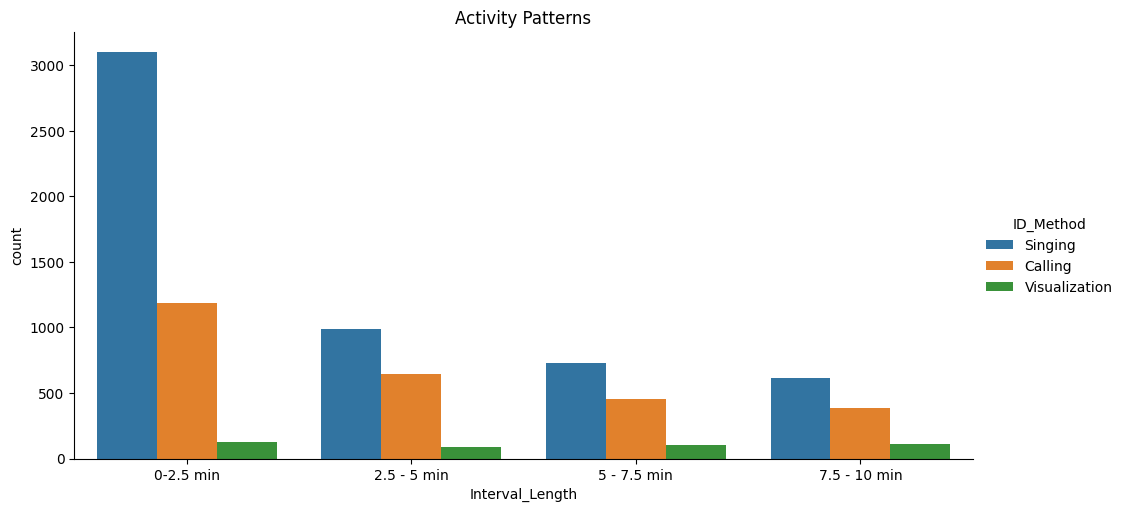

In [ ]:
# 3. Species Analysis

# Diversity Metrics: Count unique species (Scientific_Name) observed and their distribution across Location_Type.
sns.catplot(data=df,x='Common_Name',kind='count',col='Location_Type',aspect=3)
plt.xticks(rotation=90)

# Activity Patterns: Check the Interval_Length and ID_Method columns to identify the most common activity types (e.g., Singing).
sns.catplot(data=df,x='Interval_Length',kind='count',hue='ID_Method',aspect=2)
plt.title('Activity Patterns')

# Inights:
# There are some birds Appear often on the forest: [Red-bellied Woodpecker,Northern Cardinal,Carolina Wren,Eastern Wood-Pewee,Eastern Tufted Titmouse,Red-eyed Vireo,Acadian Flycatcher]

# Singing is the most frequent activity across all interval lengths, especially in the shortest interval (0-2.5 min), where its count is significantly higher than the other methods.
# Calling is the second most frequent method, but its frequency decreases as the interval length increases.
# Visualization has the lowest count across all interval lengths.It appears to be used sparingly compared to the other methods.
# For all methods (Singing, Calling, and Visualization), the number of observations decreases as the interval length increases

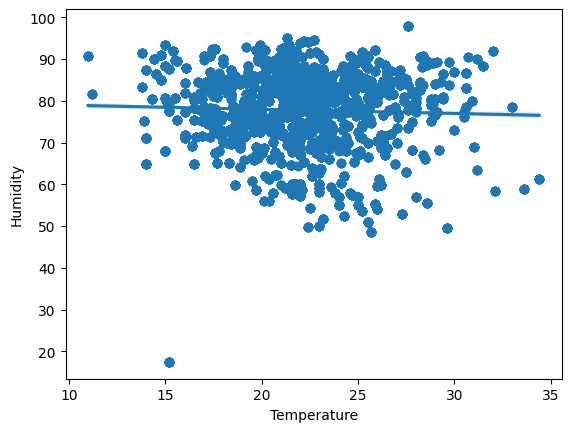

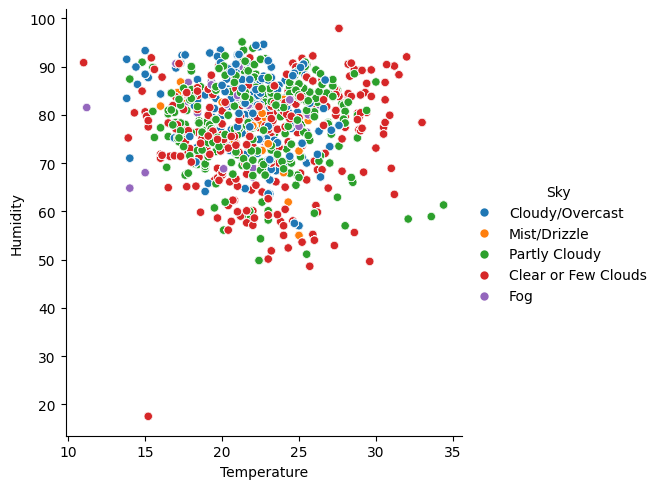

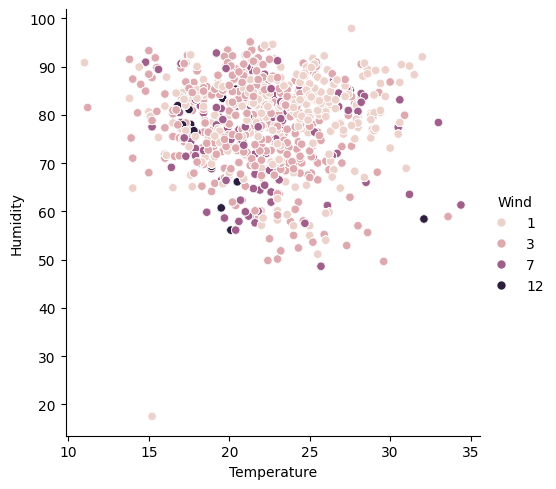

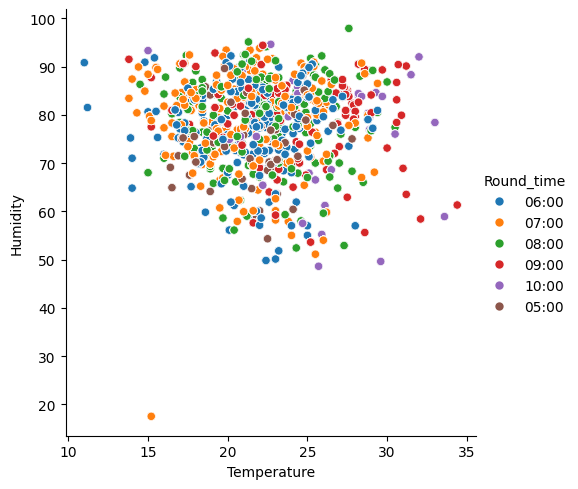

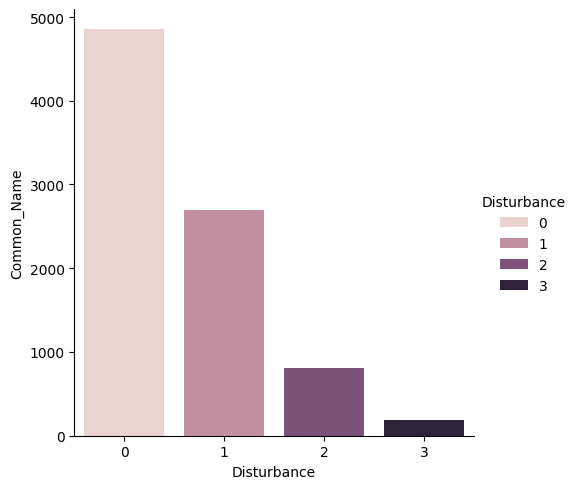

In [ ]:
# 4.  Environmental Conditions :

# Weather Correlation: Explore how Temperature, Humidity, Sky, and Wind impact observations, such as the number of birds or their distances.
sns.regplot(data=df,x='Temperature',y='Humidity')
sns.relplot(data=df,x='Temperature',y='Humidity',hue='Sky')
sns.relplot(data=df,x='Temperature',y='Humidity',hue='Wind')
sns.relplot(data=df,x='Temperature',y='Humidity',hue='Round_time')


# Disturbance Effect: Assess the impact of Disturbance (e.g., slight effect) on bird sightings.
Disturbance_Effect = df.groupby('Disturbance').agg({'Common_Name':'count'})
sns.catplot(data=Disturbance_Effect,x='Disturbance',y='Common_Name',hue='Disturbance',kind='bar')

# Insights:
# No Strong Correlation: Temperature and humidity might not be directly related in this dataset.
# Sky: Each sky condition appears across multiple temperature points.There's a lot of overlap,The data points for different conditions mix together considerably.You can't predict the sky condition just by knowing the temperature.
# Wind: values (indicated by color intensity) are mostly lower (light colors dominate), suggesting that higher wind speeds are less frequent.Higher wind speeds (darker points) are scattered and not concentrated in any specific range of temperature or humidity.

# Overall Temperature Range: The data shows temperatures ranging roughly from 10°C to 35°C, with most readings concentrated between 15°C and 30°C.
# There doesn't appear to be a strong segregation of data points by time, suggesting that temperature and humidity variations aren't strongly tied to specific hours within this morning time range
# The data points from different times are fairly well mixed throughout the plot

# Disturbance : This is a strong negative correlation where higher disturbance levels are associated with lower frequencies. The relationship appears to be roughly exponential, with each increasing level of disturbance showing a progressively smaller absolute number of occurrences.


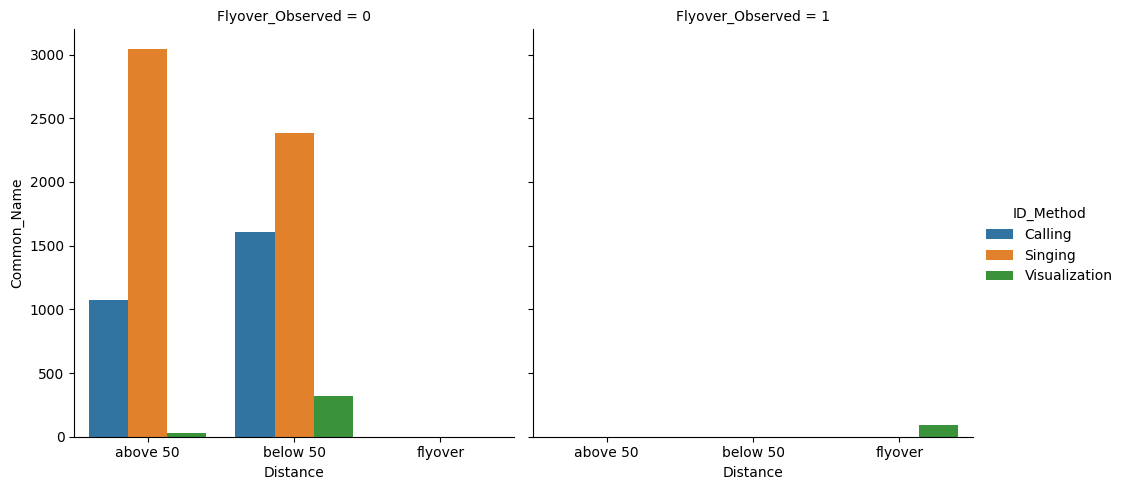

In [ ]:
# 5. Distance and Behavior

# Distance Analysis: Evaluate the Distance column to identify species typically observed closer or farther from the observer.
# Flyover Frequency: Examine the Flyover_Observed column to detect trends in bird behavior during observation.

Distance_Analysis = df.groupby(['Flyover_Observed','Distance','ID_Method']).agg({'Common_Name':'count'})
sns.catplot(data=Distance_Analysis,x='Distance',y='Common_Name',kind='bar',col='Flyover_Observed',hue='ID_Method')

# Insights:
# When Flyover_Observed = 0:
  # They can measure distances (both above and below 50)
  # They can record both calling and singing behaviors
  # Some visualization measurements are possible
  # Higher counts overall
# When Flyover_Observed = 1 :
  # Almost all distance measurements are empty/missing
  # No calling or singing behaviors are recorded
  # Only a small number of visualization observations
  # Much lower counts overall
# It's much harder to accurately estimate their distance.They're typically passing by quickly, making it difficult to observe behaviors like calling or singing.
# The only real observation possible is visual confirmation that the bird flew over.

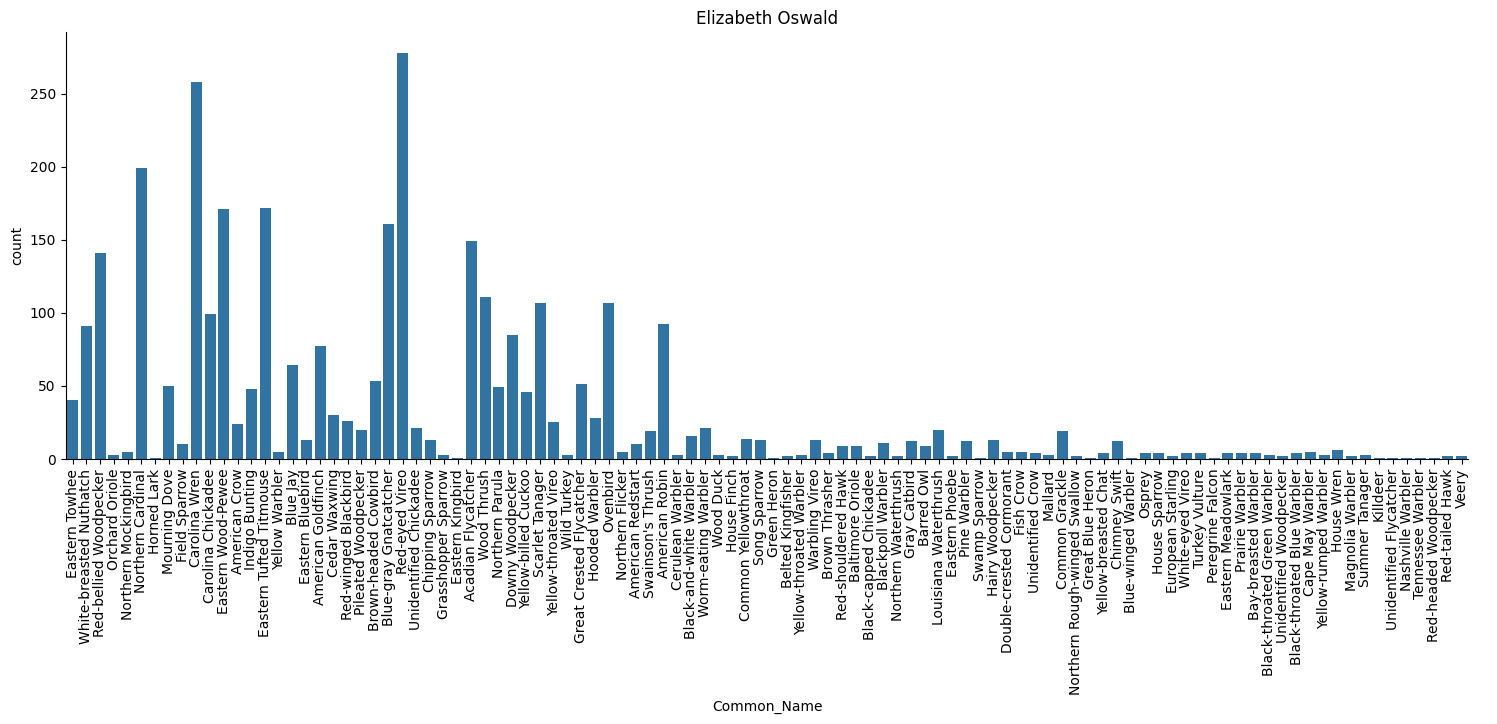

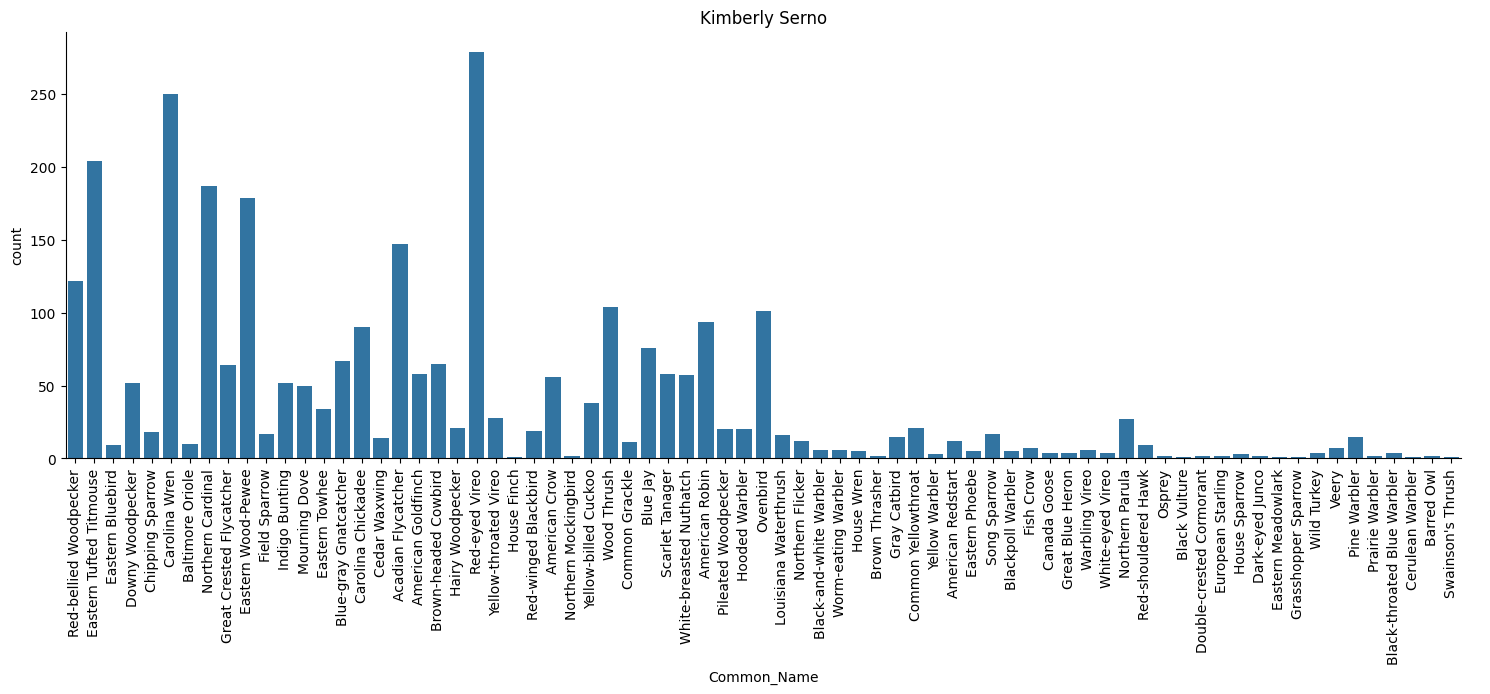

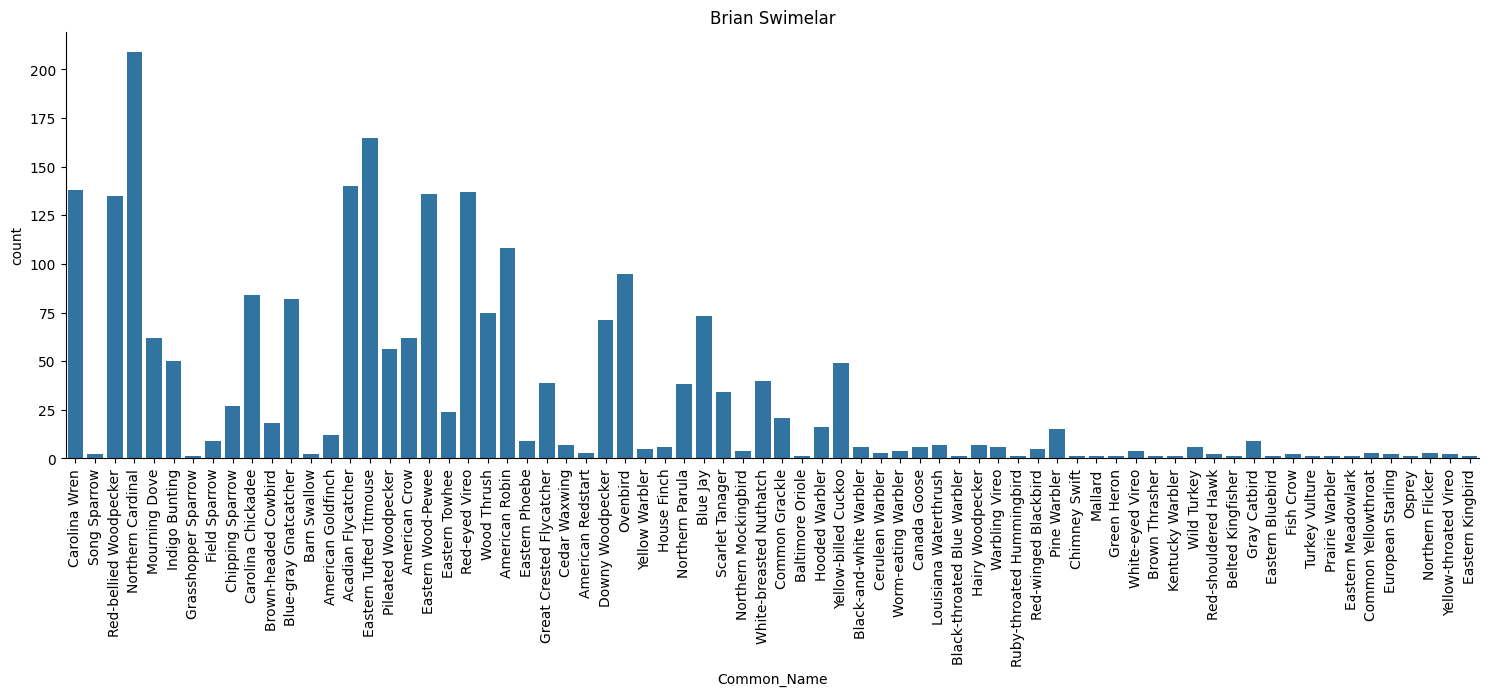

,,,Observer
Plot_Name,Date,Start_Time,


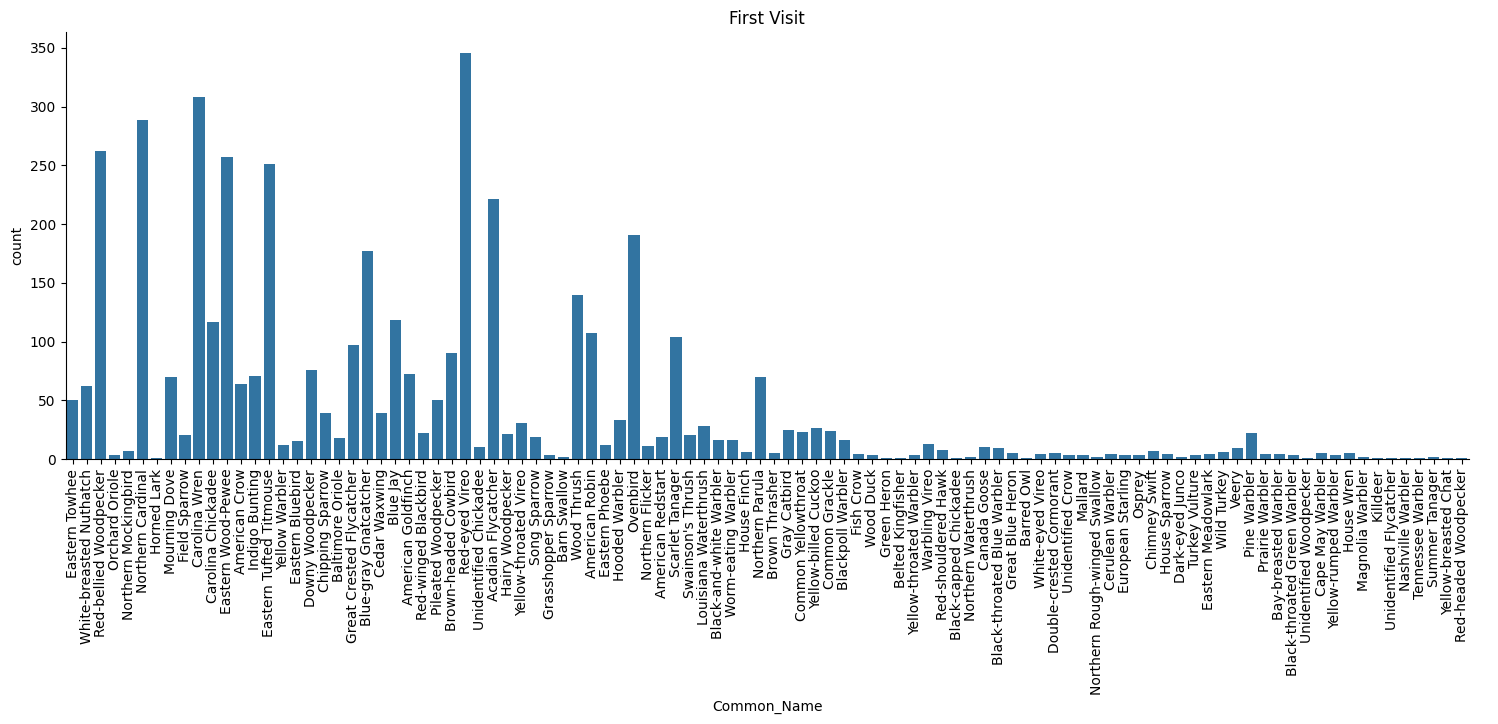

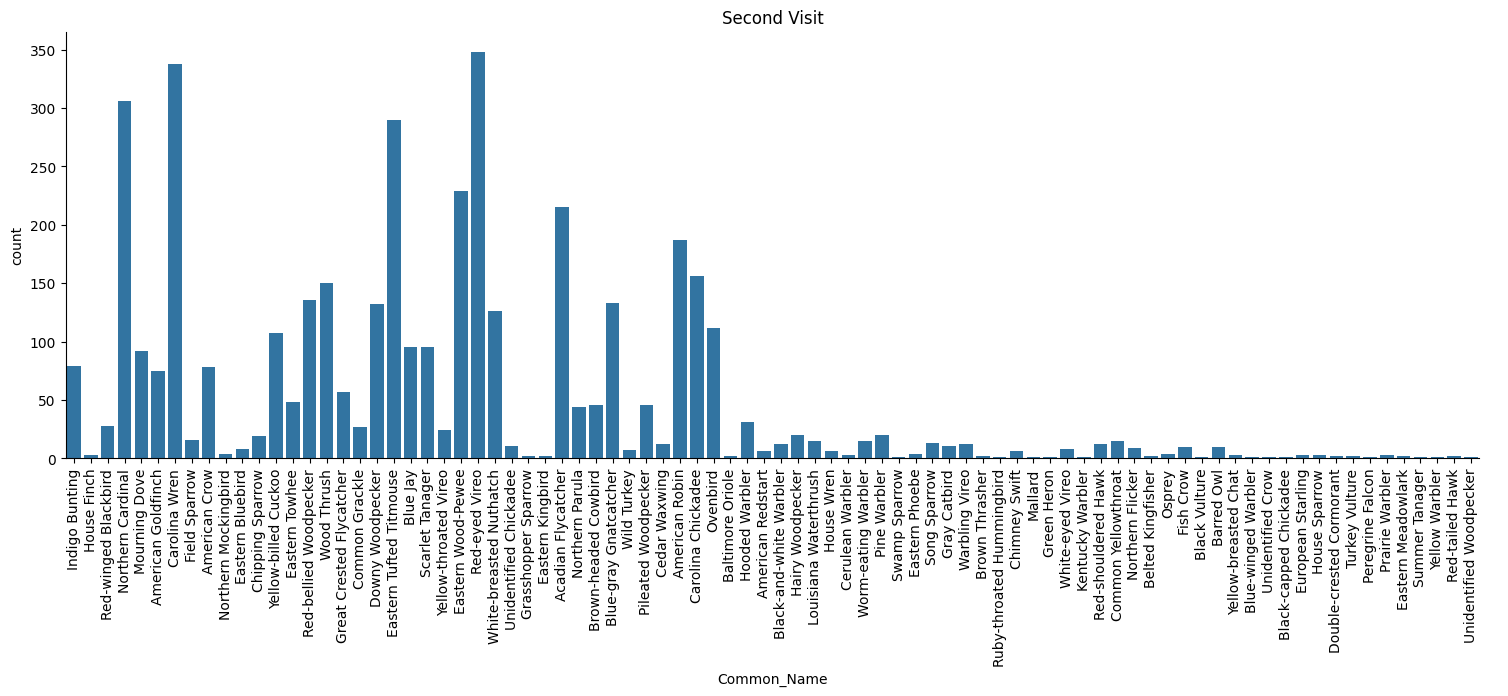

In [116]:
# 6.Observer Trends :

# Observer Bias: Analyze data by Observer to check if specific individuals report more observations or certain species.
for Observer in df['Observer'].unique():
    filtered_Oberver = df[df['Observer']== Observer]
    sns.catplot(data=filtered_Oberver,x='Common_Name',kind='count',aspect=3)
    plt.title(f'{Observer}')
    plt.xticks(rotation=90)
    plt.show()

# determine whether observers worked together or separately
grouped = df.groupby(['Plot_Name', 'Date', 'Start_Time',]).agg({'Observer':'nunique'})
group = grouped[grouped['Observer'] > 1]
display(group)


# Inights:
# Red-eyed Vireo: Both Elizabeth Oswald and Kimberly Serno observed this species around 275 times, showing consistency between observers
# several species that appear frequently across all three observers: [Carolina Wren,Eastern Tufted Titmouse,Northern Cardinal,White-breasted Nuthatch..few more]
# Possibility: 
   # These species are common in the study area
   # They are relatively easy to identify
   # The observers are consistent in their identification abilities  


# Visit Patterns: Evaluate the Visit column to see how repeated visits affect species count or diversity.
first_vist = df.query("Visit == 1 ")
sns.catplot(data=first_vist,x='Common_Name',kind='count',aspect=3)
plt.title('First Visit')
plt.xticks(rotation=90)
plt.show()

second_vist = df.query("Visit > 1")
sns.catplot(data=second_vist,x='Common_Name',kind='count',aspect=3)
plt.title('Second Visit')
plt.xticks(rotation=90)
plt.show()

# Insights:
# Both visits show similar overall patterns of species abundance
# The most common species remain consistently high in both visits.Red-eyed Vireo remains the most frequently observed species in both visits (~340-350 counts)
# Some species show increased counts in the Second Visit:
   # Indigo Bunting (higher counts in second visit)
   # Red-bellied Woodpecker (noticeable increase)
   # Carolina Wren (slight increase)

# Most common species maintain relatively stable counts between visits:
   # Red-eyed Vireo
   # Eastern Towhee
   # Northern Cardinal
   #White-breasted Nuthatch
   

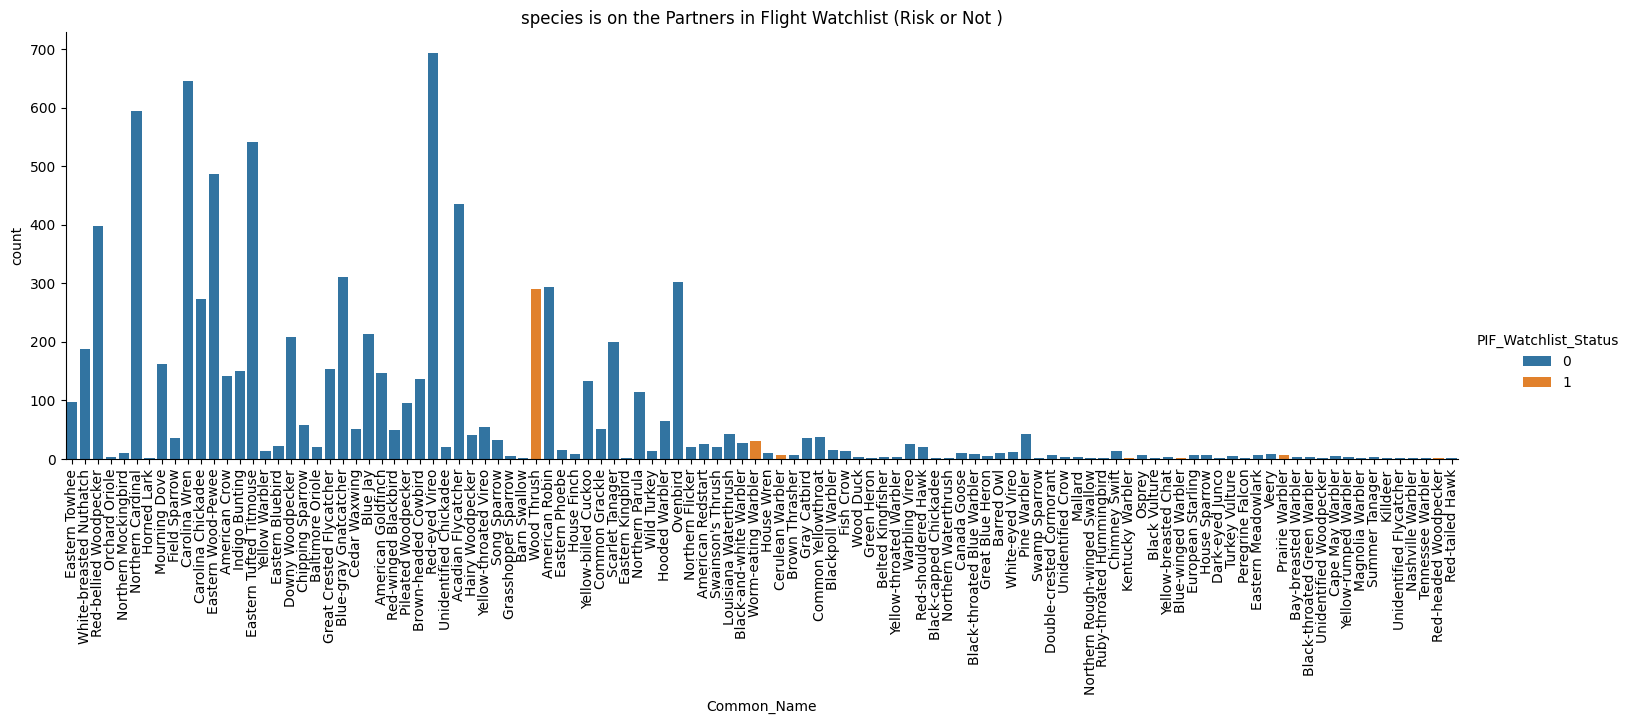

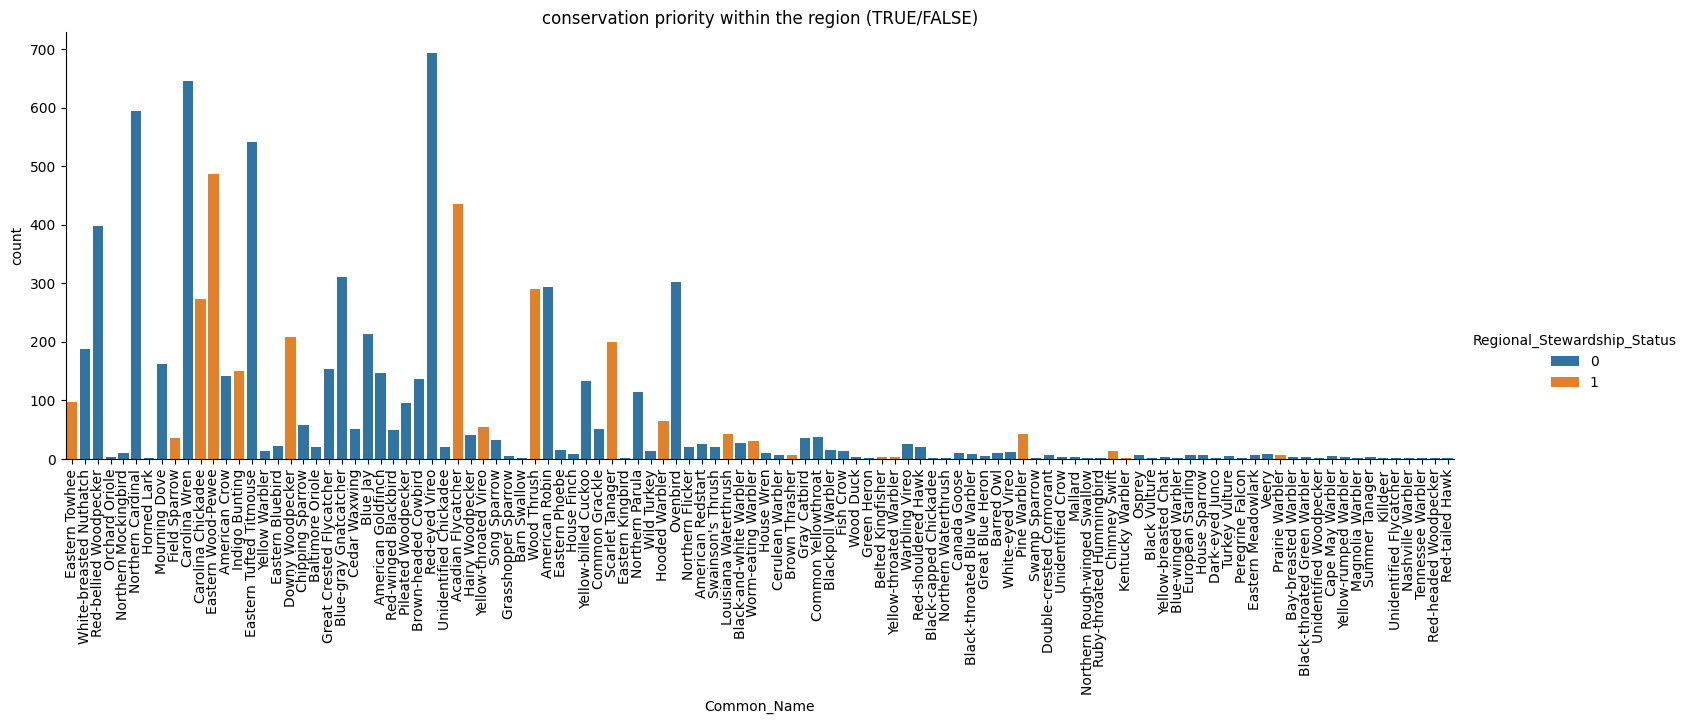

In [125]:
# 7.Conservation Insights :

# Watchlist Trends: Use the PIF_Watchlist_Status and Regional_Stewardship_Status to identify trends in species that are at risk or require conservation focus.
sns.catplot(data=df,x='Common_Name',kind='count',hue='PIF_Watchlist_Status',aspect=3)
plt.title('species is on the Partners in Flight Watchlist (Risk or Not )')
plt.xticks(rotation=90)
plt.show()

# Insights:
# there only few birds are to risk:
  # Wood Thrush
  # Worm-eating Warbler
  # Cerulean Warbler
  # Prairie Warbler
# An important observation is that warbler species appear frequently in the data, and some are of conservation concern.


sns.catplot(data=df,x='Common_Name',kind='count',hue='Regional_Stewardship_Status',aspect=3)
plt.title('conservation priority within the region (TRUE/FALSE)')
plt.xticks(rotation=90)
plt.show()

# Insights:
#Regionally, more species are classified as 'at risk' compared to the PIF (Partners in Flight) Watchlist. Additionally, some species that are categorized as 'at risk' regionally do not appear on the PIF Watchlist,and some species categorized where risk is in pif watchlist.


